# Analysis of customer preferences in car purchases

The aim of the project Analysis of customer preferences in car purchases is to understand the key factors that influence customers' purchasing decisions when choosing cars. The analysis includes examining the popularity of various brands, models, colors and body types, as well as examining how gender, income and region affect purchasing preferences. The results of this analysis can help dealers and manufacturers better match their offerings to market needs and target marketing strategies more effectively.

Research questions:

1 What are the most purchased car brands and models?

Which brands and models are most often chosen by customers?

Are there differences in the popularity of brands depending on the region of sale?

2 What color preferences do customers have when choosing cars?

What car colors are the most popular?

Do the colors of the cars vary depending on the region or car model?

3 What body types are the most chosen?

Which body types are preferred by customers?

Do body type choices vary based on customer income?

4 Does the customer's gender affect purchasing choices?

What car models, brands and colors are popular with men and women?

Is there a difference in the choice of body type depending on gender?

5 How does a customer's income affect their choice of car?

Is there a correlation between income and the price of a car?

How does customer income affect the choice of brand, model, color or body type?

6 How does the sales region affect customer choices?

Do customers from different regions choose different brands, models, colors or body types?


7 What factors affect the price of a car?

Does the price of the car depend on the make, model, body type, color or region?

What factors have the biggest impact on price differences?

# Preparing data

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
!pip install plotly

In [45]:
import plotly.express as px

In [46]:
data = pd.read_csv("Car Sales.xlsx - car_data.csv")

In [47]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [49]:
data.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [50]:
missing_customer_name = data[data['Customer Name'].isna()]
print(missing_customer_name)


            Car_id       Date Customer Name Gender  Annual Income  \
7564  C_CND_007565  11/5/2022           NaN   Male         680000   

           Dealer_Name Company       Model                     Engine  \
7564  Saab-Belle Dodge   Dodge  Ram Pickup  DoubleÂ Overhead Camshaft   

     Transmission       Color  Price ($)  Dealer_No  Body Style    Phone  \
7564         Auto  Pale White      45000  60504-7114    Hardtop  7203103   

     Dealer_Region  
7564        Aurora  


# I don't need the customer's name for this analysis, so I will leave this row in the database.

In [51]:
print(data.dtypes)

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object


# First task

What are the most purchased car brands and models?

Which brands and models are most often chosen by customers?

Are there differences in the popularity of brands depending on the region of sale?

In [52]:
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']
print(company_counts)

       Company  Count
0    Chevrolet   1819
1        Dodge   1671
2         Ford   1614
3   Volkswagen   1333
4   Mercedes-B   1285
5   Mitsubishi   1277
6     Chrysler   1120
7   Oldsmobile   1111
8       Toyota   1110
9       Nissan    886
10     Mercury    874
11       Lexus    802
12     Pontiac    796
13         BMW    790
14       Volvo    789
15       Honda    708
16       Acura    689
17    Cadillac    652
18    Plymouth    617
19      Saturn    586
20     Lincoln    492
21        Audi    468
22       Buick    439
23      Subaru    405
24        Jeep    363
25     Porsche    361
26     Hyundai    264
27        Saab    210
28    Infiniti    195
29      Jaguar    180


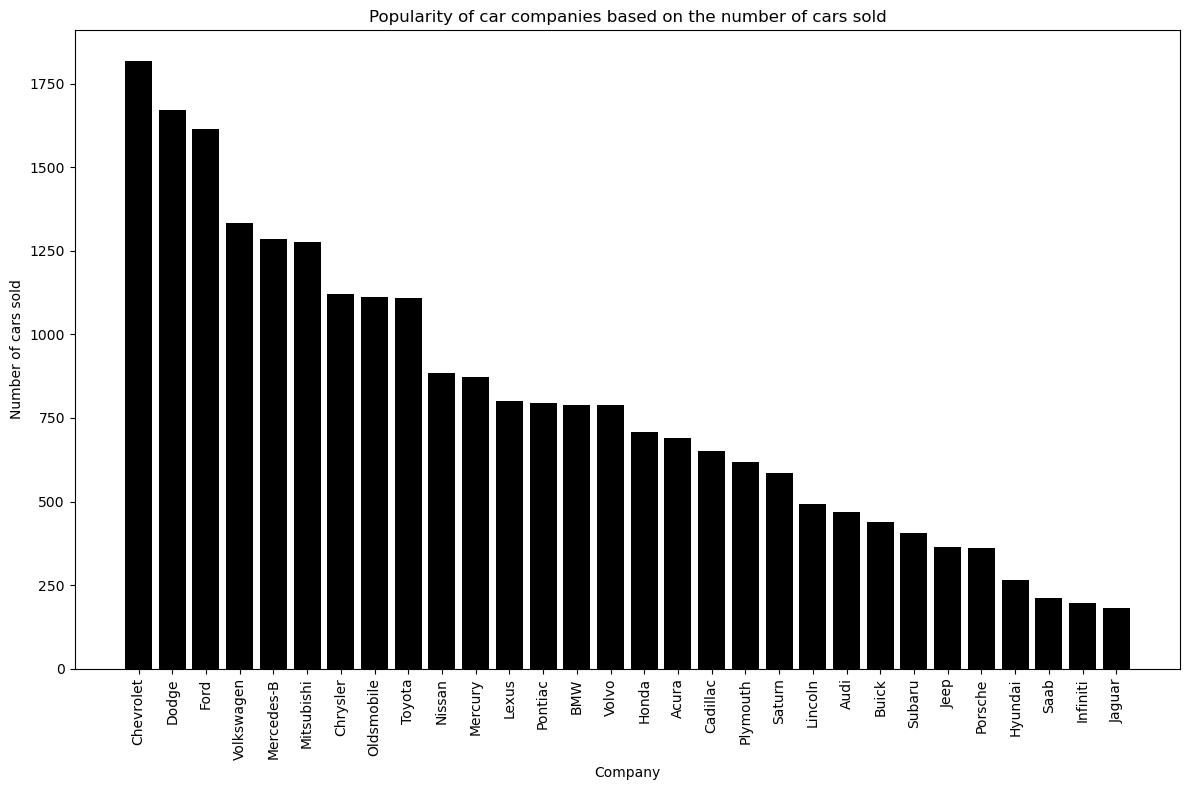

In [53]:
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']

plt.figure(figsize=(12, 8))
plt.bar(company_counts['Company'], company_counts['Count'], color='black')
plt.title('Popularity of car companies based on the number of cars sold')
plt.xlabel('Company')
plt.ylabel('Number of cars sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [54]:
company_model_counts = data.groupby(['Company', 'Model']).size().reset_index(name='Model_Count')
print(company_model_counts)

    Company    Model  Model_Count
0     Acura  Integra           48
1     Acura       RL          372
2     Acura       TL          269
3      Audi       A4          102
4      Audi       A6          329
..      ...      ...          ...
150   Volvo      S40          282
151   Volvo      S70          148
152   Volvo      S80           86
153   Volvo      V40           22
154   Volvo      V70           41

[155 rows x 3 columns]


In [55]:
most_common_model = company_model_counts.loc[company_model_counts.groupby('Company')['Model_Count'].idxmax()]
print(most_common_model)

        Company          Model  Model_Count
1         Acura             RL          372
4          Audi             A6          329
8           BMW           528i          324
11        Buick    Park Avenue          202
15     Cadillac       Eldorado          232
26    Chevrolet          Prizm          411
30     Chrysler            LHS          330
40        Dodge     Ram Pickup          383
49         Ford       Explorer          225
56        Honda         Accord          243
63      Hyundai         Sonata          164
64     Infiniti            I30          195
65       Jaguar         S-Type          180
68         Jeep       Wrangler          164
72        Lexus          LS400          354
75      Lincoln    Continental          206
83   Mercedes-B        S-Class          238
88      Mercury  Grand Marquis          261
94   Mitsubishi       Diamante          418
103      Nissan     Pathfinder          267
112  Oldsmobile     Silhouette          411
114    Plymouth           Neon  

In [56]:
company_model_counts_df = pd.DataFrame(company_model_counts)

most_common_model_sorted = company_model_counts_df.loc[company_model_counts_df.groupby('Company')['Model_Count'].idxmax()].sort_values(by='Model_Count', ascending=False)

print(most_common_model_sorted)


        Company          Model  Model_Count
94   Mitsubishi       Diamante          418
112  Oldsmobile     Silhouette          411
26    Chevrolet          Prizm          411
148  Volkswagen         Passat          391
40        Dodge     Ram Pickup          383
1         Acura             RL          372
72        Lexus          LS400          354
30     Chrysler            LHS          330
4          Audi             A6          329
8           BMW           528i          324
150       Volvo            S40          282
103      Nissan     Pathfinder          267
88      Mercury  Grand Marquis          261
132      Subaru       Forester          255
56        Honda         Accord          243
121     Pontiac        Sunfire          241
83   Mercedes-B        S-Class          238
15     Cadillac       Eldorado          232
49         Ford       Explorer          225
75      Lincoln    Continental          206
11        Buick    Park Avenue          202
64     Infiniti            I30  

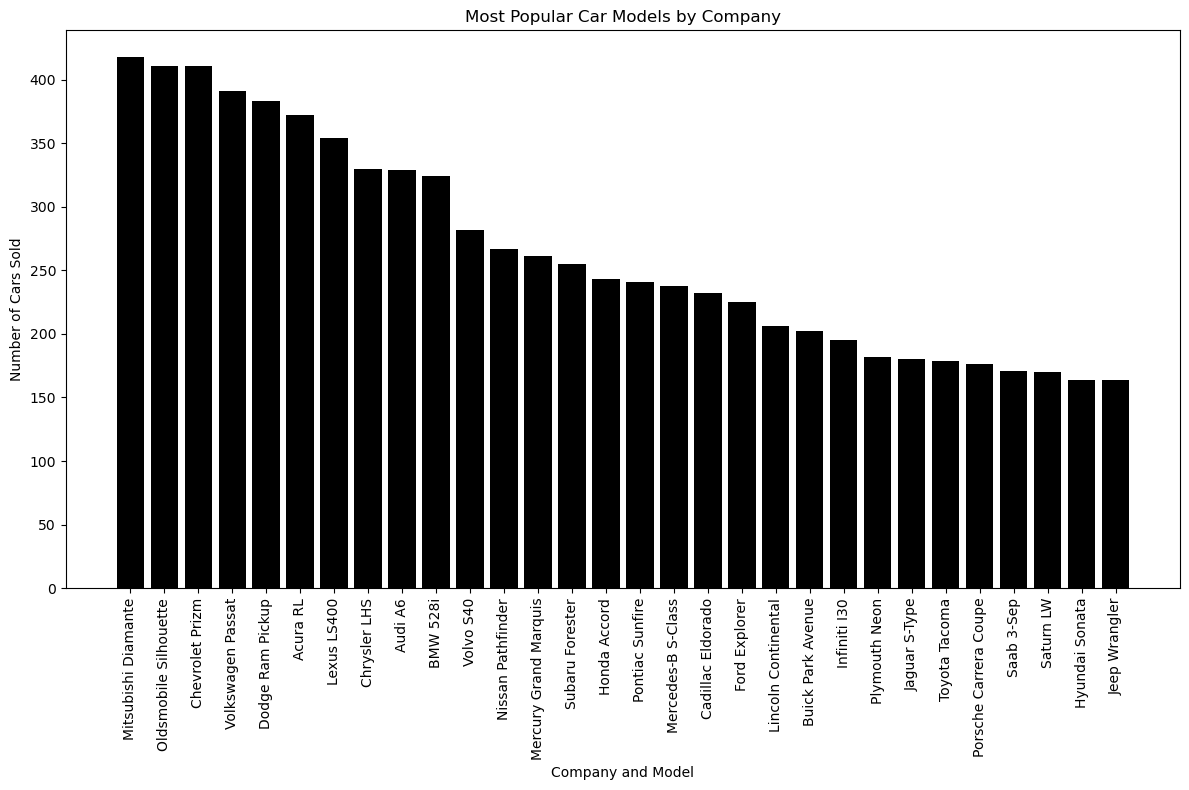

In [57]:
most_common_model_sorted['Company_Model'] = most_common_model_sorted['Company'] + ' ' + most_common_model_sorted['Model']

plt.figure(figsize=(12, 8))
plt.bar(most_common_model_sorted['Company_Model'], most_common_model_sorted['Model_Count'], color='#000000')

plt.title('Most Popular Car Models by Company')
plt.xlabel('Company and Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


In [58]:
region_model_counts = data.groupby(['Dealer_Region', 'Company', 'Model']).size().reset_index(name='Count')
most_common_models_in_regions = region_model_counts.loc[region_model_counts.groupby('Dealer_Region')['Count'].idxmax()]
print(most_common_models_in_regions)


     Dealer_Region     Company       Model  Count
94          Aurora  Mitsubishi    Diamante     64
181         Austin   Chevrolet       Prizm     96
458     Greenville  Volkswagen      Passat     55
491     Janesville   Chevrolet       Prizm     81
660     Middletown       Dodge  Ram Pickup     59
868          Pasco  Mitsubishi    Diamante     58
1077    Scottsdale  Volkswagen      Passat     76


In [59]:
!pip install folium

# The most sold car in each region

In [60]:
import folium

coordinates = {
    'Aurora': {'Latitude': 39.7294, 'Longitude': -104.8319},
    'Austin': {'Latitude': 30.2672, 'Longitude': -97.7431},
    'Greenville': {'Latitude': 34.8526, 'Longitude': -82.3940},
    'Janesville': {'Latitude': 42.6828, 'Longitude': -89.0187},
    'Middletown': {'Latitude': 39.5151, 'Longitude': -84.3983},
    'Pasco': {'Latitude': 46.2396, 'Longitude': -119.1006},
    'Scottsdale': {'Latitude': 33.4942, 'Longitude': -111.9261}
}

most_common_models_in_regions['Latitude'] = most_common_models_in_regions['Dealer_Region'].map(lambda x: coordinates[x]['Latitude'])
most_common_models_in_regions['Longitude'] = most_common_models_in_regions['Dealer_Region'].map(lambda x: coordinates[x]['Longitude'])

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

for index, row in most_common_models_in_regions.iterrows():
    popup_text = f"Region: {row['Dealer_Region']}<br>Company: {row['Company']}<br>Model: {row['Model']}<br>Count: {row['Count']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m


# Task 1 Summary

The data analysis shows that Chevrolet, Dodge, and Ford are the most frequently chosen car brands, with Chevrolet leading the market (1819 vehicles sold). In terms of specific models, Mitsubishi Diamante (418) and Chevrolet Prizm (411) are the most popular. Interestingly, customer preferences vary by region – for example, in Aurora, the most popular model is Mitsubishi Diamante, while in Austin, Chevrolet Prizm dominates, and in Greenville and Scottsdale, the Volkswagen Passat is the top choice. These findings suggest that brand and model preferences are strongly influenced by regional factors, likely due to local conditions, availability, or cultural preferences.

# Second Task


What color preferences do customers have when choosing cars?

What car colors are the most popular?

Do the colors of the cars vary depending on the region or car model?

In [61]:
color_popularity = data.groupby('Color').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
print(color_popularity)


        Color  Count
1  Pale White  11256
0       Black   7857
2         Red   4793


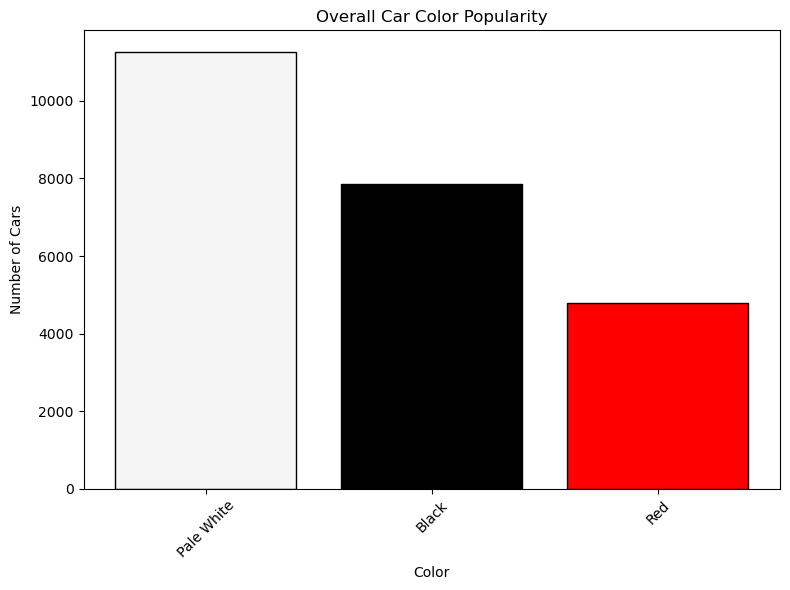

In [62]:
color_map = {'Pale White': 'whitesmoke', 'Black': 'black', 'Red': 'red'}
bar_colors = color_popularity['Color'].map(color_map)

plt.figure(figsize=(8, 6))
plt.bar(color_popularity['Color'], color_popularity['Count'], color=bar_colors, edgecolor='black')  # Dodanie czarnego obramowania

plt.title('Overall Car Color Popularity')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [63]:
color_count_by_region = data.groupby(['Dealer_Region', 'Color']).size().reset_index(name='Count')

print(color_count_by_region)


   Dealer_Region       Color  Count
0         Aurora       Black   1012
1         Aurora  Pale White   1496
2         Aurora         Red    622
3         Austin       Black   1364
4         Austin  Pale White   1937
5         Austin         Red    834
6     Greenville       Black   1052
7     Greenville  Pale White   1467
8     Greenville         Red    609
9     Janesville       Black   1249
10    Janesville  Pale White   1807
11    Janesville         Red    765
12    Middletown       Black    999
13    Middletown  Pale White   1461
14    Middletown         Red    668
15         Pasco       Black   1037
16         Pasco  Pale White   1472
17         Pasco         Red    622
18    Scottsdale       Black   1144
19    Scottsdale  Pale White   1616
20    Scottsdale         Red    673


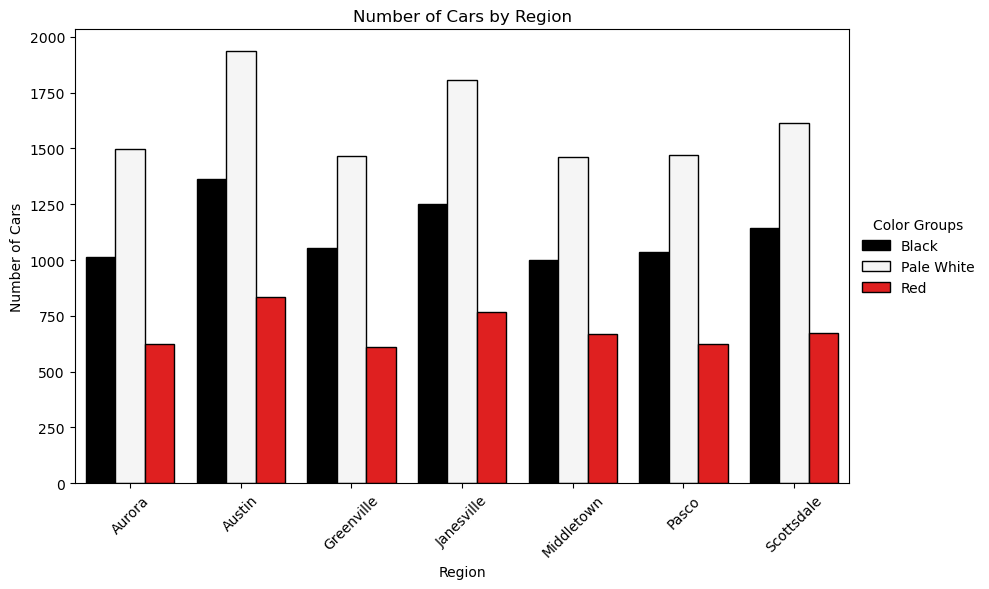

In [64]:
palette = {'Black': 'black', 'Pale White': 'whitesmoke', 'Red': 'red'}

plt.figure(figsize=(10, 6))
sns.barplot(x='Dealer_Region', y='Count', hue='Color', data=color_count_by_region, 
            palette=palette, edgecolor='black') 

plt.title('Number of Cars by Region')
plt.ylabel('Number of Cars')
plt.xlabel('Region')
plt.xticks(rotation=45)

plt.legend(title='Color Groups', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.tight_layout()
plt.show()


In [65]:
region_model_counts = data.groupby(['Dealer_Region', 'Company', 'Model']).size().reset_index(name='Count')
most_common_models_in_regions = region_model_counts.loc[region_model_counts.groupby('Dealer_Region')['Count'].idxmax()]

popular_models_data = data[data.set_index(['Dealer_Region', 'Model']).index.isin(most_common_models_in_regions.set_index(['Dealer_Region', 'Model']).index)]

color_count_for_popular_models = popular_models_data.groupby(['Dealer_Region', 'Model', 'Color']).size().reset_index(name='Count')

print(color_count_for_popular_models)


   Dealer_Region       Model       Color  Count
0         Aurora    Diamante       Black     29
1         Aurora    Diamante  Pale White     23
2         Aurora    Diamante         Red     12
3         Austin       Prizm       Black     37
4         Austin       Prizm  Pale White     37
5         Austin       Prizm         Red     22
6     Greenville      Passat       Black     13
7     Greenville      Passat  Pale White     35
8     Greenville      Passat         Red      7
9     Janesville       Prizm       Black     35
10    Janesville       Prizm  Pale White     30
11    Janesville       Prizm         Red     16
12    Middletown  Ram Pickup       Black     11
13    Middletown  Ram Pickup  Pale White     40
14    Middletown  Ram Pickup         Red      8
15         Pasco    Diamante       Black     25
16         Pasco    Diamante  Pale White     21
17         Pasco    Diamante         Red     12
18    Scottsdale      Passat       Black     19
19    Scottsdale      Passat  Pale White

In [66]:
model_counts = data.groupby(['Company', 'Model']).size().reset_index(name='Count')
most_popular_models = model_counts.loc[model_counts.groupby('Company')['Count'].idxmax()]

color_counts = data.groupby(['Model', 'Color']).size().reset_index(name='Color_Count')

most_popular_models_with_colors = pd.merge(most_popular_models, color_counts, on='Model', how='left')

most_popular_models_with_colors = most_popular_models_with_colors[['Company', 'Model', 'Color', 'Color_Count']].sort_values(by=['Company', 'Color_Count'], ascending=[True, False])

print(most_popular_models_with_colors)


       Company   Model       Color  Color_Count
1        Acura      RL  Pale White          135
2        Acura      RL         Red          119
0        Acura      RL       Black          118
3         Audi      A6       Black          180
4         Audi      A6  Pale White          149
..         ...     ...         ...          ...
82  Volkswagen  Passat       Black          104
84  Volkswagen  Passat         Red           65
86       Volvo     S40  Pale White          113
85       Volvo     S40       Black           88
87       Volvo     S40         Red           81

[88 rows x 4 columns]


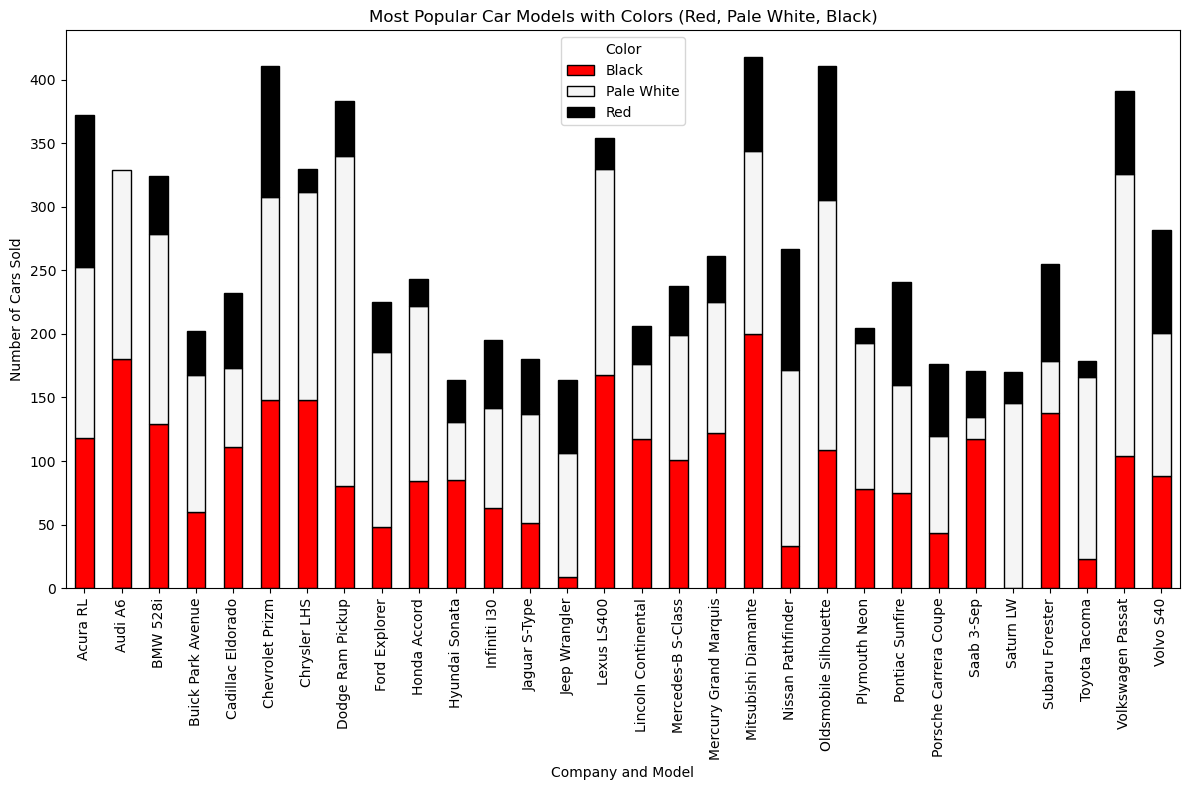

In [67]:
colors = ['Red', 'Pale White', 'Black']
filtered_data = most_popular_models_with_colors[most_popular_models_with_colors['Color'].isin(colors)]

pivot_data = filtered_data.pivot_table(index=['Company', 'Model'], columns='Color', values='Color_Count', fill_value=0)

pivot_data.index = pivot_data.index.map(lambda x: f'{x[0]} {x[1]}')

ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'whitesmoke', 'black'], edgecolor='black')

plt.title('Most Popular Car Models with Colors (Red, Pale White, Black)')
plt.xlabel('Company and Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


# Task 2 Summary

The analysis of customer color preferences shows that the most popular car colors are Pale White (11,256 cars), Black (7,857 cars), and Red (4,793 cars).

Color preferences also vary by region. For example, in the Aurora region, the dominant colors are Pale White (1,496 cars) and Black (1,012 cars), while in Austin, the most chosen colors are Pale White (1,937 cars) and Black (1,364 cars). Similar trends are observed in other regions like Janesville and Greenville, where these two colors are also the most popular.

Additionally, when looking at specific models, certain colors tend to dominate. For instance, for the Mitsubishi Diamante in the Aurora region, the most popular colors are Black (29 cars) and Pale White (23 cars), while for the Volkswagen Passat in Greenville, Pale White (35 cars) is the leading color.

These findings suggest that both location and car model influence customers' color preferences.

# Third Task 

What body types are the most chosen?

Do body type choices vary based on customer income?

In [68]:
body_style_popularity = data.groupby('Body Style').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

print(body_style_popularity)


  Body Style  Count
3        SUV   6374
1  Hatchback   6128
4      Sedan   4488
2  Passenger   3945
0    Hardtop   2971


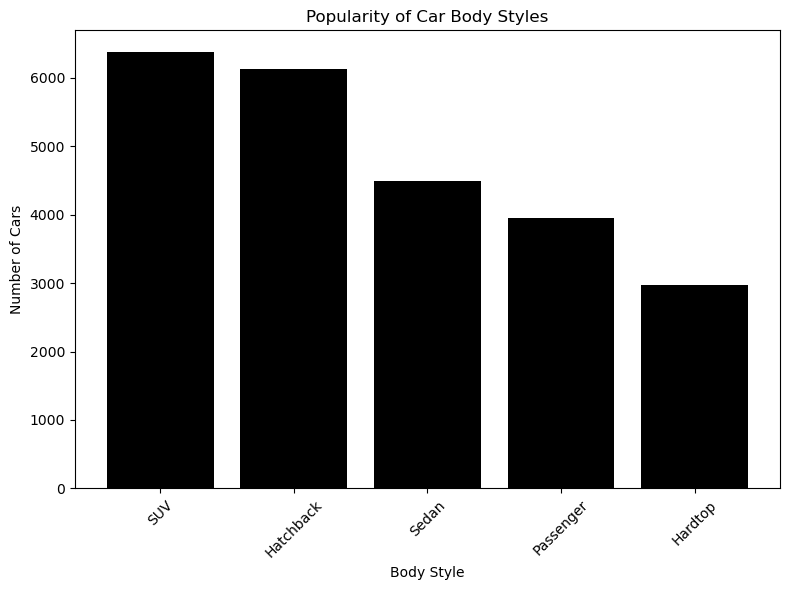

In [69]:
plt.figure(figsize=(8, 6))
plt.bar(body_style_popularity['Body Style'], body_style_popularity['Count'], color='black')
plt.title('Popularity of Car Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
max_income = data['Annual Income'].max()
min_income = data['Annual Income'].min()
mean_income = data['Annual Income'].mean()

print(f"Maximum Annual Income: {max_income}")
print(f"Minimum Annual Income: {min_income}")
print(f"Average Annual Income: {mean_income}")

Maximum Annual Income: 11200000
Minimum Annual Income: 10080
Average Annual Income: 830840.2851167071


In [71]:
bins = [10000, 100000, 500000, 1000000, 5000000, 11200000]
labels = ['Very Low Income', 'Low Income', 'Middle Income', 'High Income', 'Very High Income']

data['Income Group'] = pd.cut(data['Annual Income'], bins=bins, labels=labels, right=False)

income_body_style_counts = data.groupby(['Income Group', 'Body Style']).size().reset_index(name='Car Count')

print(income_body_style_counts)


        Income Group Body Style  Car Count
0    Very Low Income    Hardtop        609
1    Very Low Income  Hatchback       1331
2    Very Low Income  Passenger        911
3    Very Low Income        SUV       1418
4    Very Low Income      Sedan       1007
5         Low Income    Hardtop        289
6         Low Income  Hatchback        494
7         Low Income  Passenger        359
8         Low Income        SUV        585
9         Low Income      Sedan        375
10     Middle Income    Hardtop       1173
11     Middle Income  Hatchback       2209
12     Middle Income  Passenger       1422
13     Middle Income        SUV       2375
14     Middle Income      Sedan       1668
15       High Income    Hardtop        896
16       High Income  Hatchback       2085
17       High Income  Passenger       1248
18       High Income        SUV       1984
19       High Income      Sedan       1430
20  Very High Income    Hardtop          4
21  Very High Income  Hatchback          8
22  Very Hi

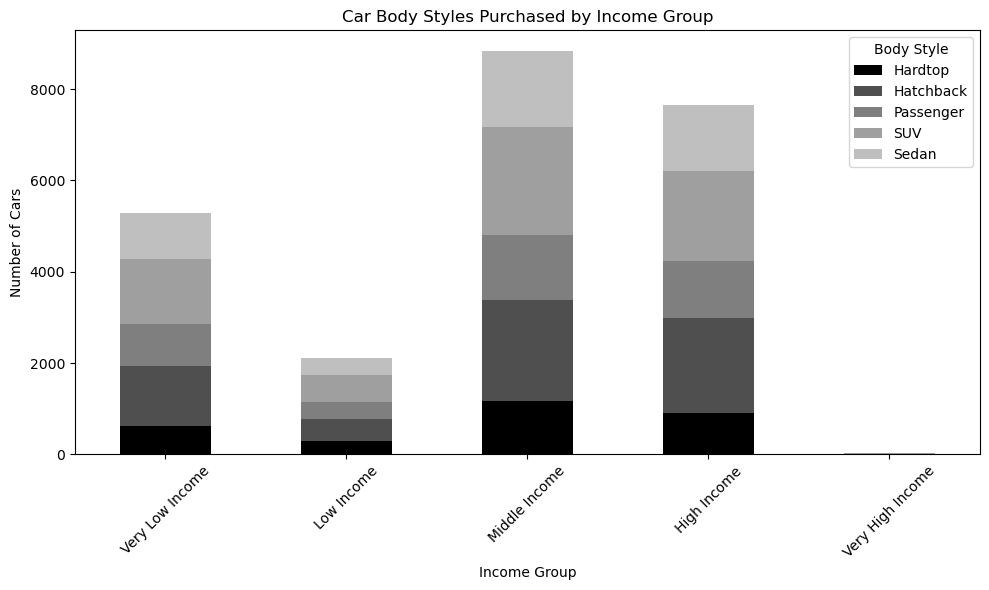

In [72]:
pivot_data = income_body_style_counts.pivot(index='Income Group', columns='Body Style', values='Car Count')

colors = ['#000000', '#4f4f4f', '#7f7f7f', '#9f9f9f', '#bfbfbf']

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title('Car Body Styles Purchased by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Body Style')

plt.show()


# Task 3 Summary

The analysis shows that the most popular car body type among customers is SUV, with a total of 6,374 vehicles sold. Following closely are Hatchback (6,128 cars), Sedan (4,488 cars), and Passenger vehicles (3,945 cars).

When looking at customer preferences based on income groups, we observe that SUVs and Hatchbacks are consistently popular across all income levels. For example, customers in the Middle Income group prefer SUVs (2,375 cars) and Hatchbacks (2,209 cars). Similarly, in the Very Low Income group, Hatchbacks and SUVs are again the most chosen body styles. However, as income increases, we see that higher-income groups tend to purchase more SUVs and Sedans, with Very High Income customers still choosing SUVs (12 cars) as their top choice, even with fewer overall purchases.

This indicates that while SUVs remain a popular choice across all income groups, there is a slight shift towards larger and more expensive body types as income increases.

# Fourth Task

Does the customer's gender affect purchasing choices?

What car models, brands, body types and colors are popular with men and women?


In [73]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Group
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Very Low Income
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High Income
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,High Income
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Very Low Income
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,High Income


In [74]:
female_car_brands = data[data['Gender'] == 'Female'].groupby('Company').size().reset_index(name='Female_Count')

male_car_brands = data[data['Gender'] == 'Male'].groupby('Company').size().reset_index(name='Male_Count')

combined_car_brands = pd.merge(female_car_brands, male_car_brands, on='Company', how='outer')

combined_car_brands.fillna(0, inplace=True)

combined_car_brands['Total_Count'] = combined_car_brands['Female_Count'] + combined_car_brands['Male_Count']
combined_car_brands = combined_car_brands.sort_values(by='Total_Count', ascending=False)

combined_car_brands


,Company,Female_Count,Male_Count,Total_Count
5,Chevrolet,388,1431,1819
7,Dodge,344,1327,1671
8,Ford,367,1247,1614
28,Volkswagen,289,1044,1333
16,Mercedes-B,292,993,1285
18,Mitsubishi,269,1008,1277
6,Chrysler,246,874,1120
20,Oldsmobile,218,893,1111
27,Toyota,222,888,1110
19,Nissan,208,678,886


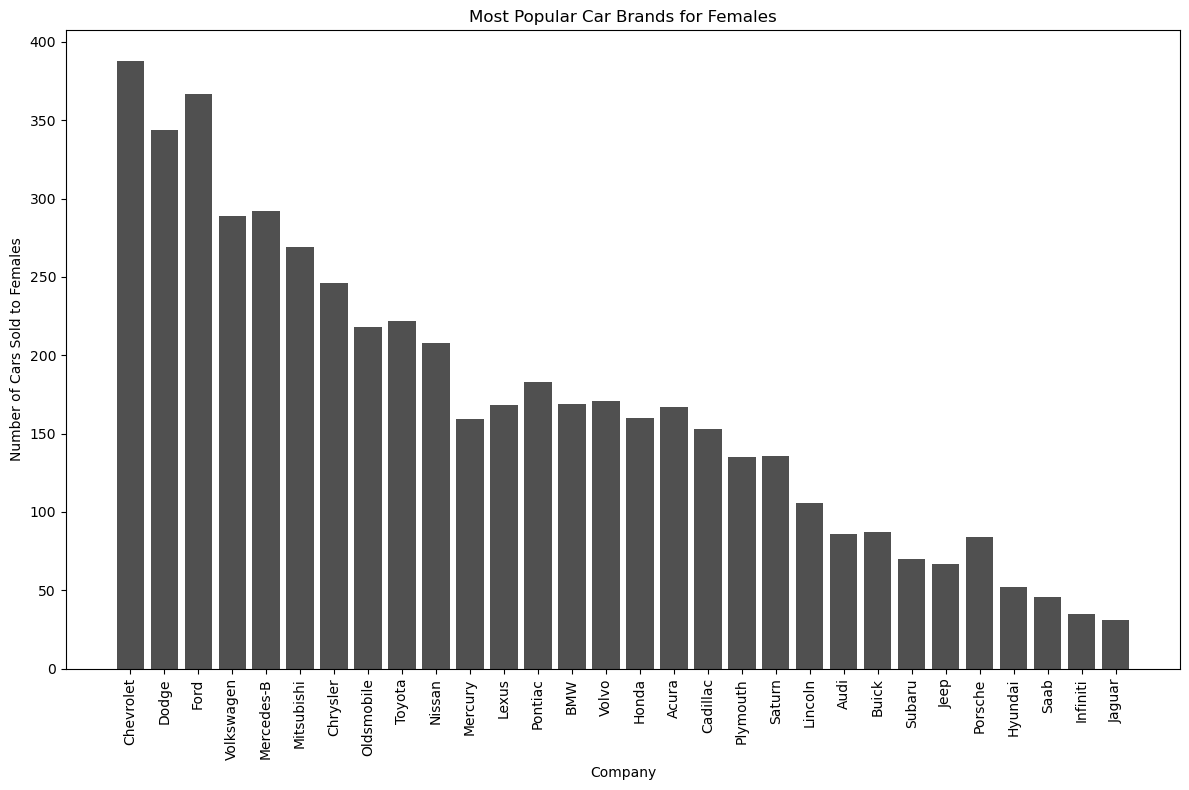

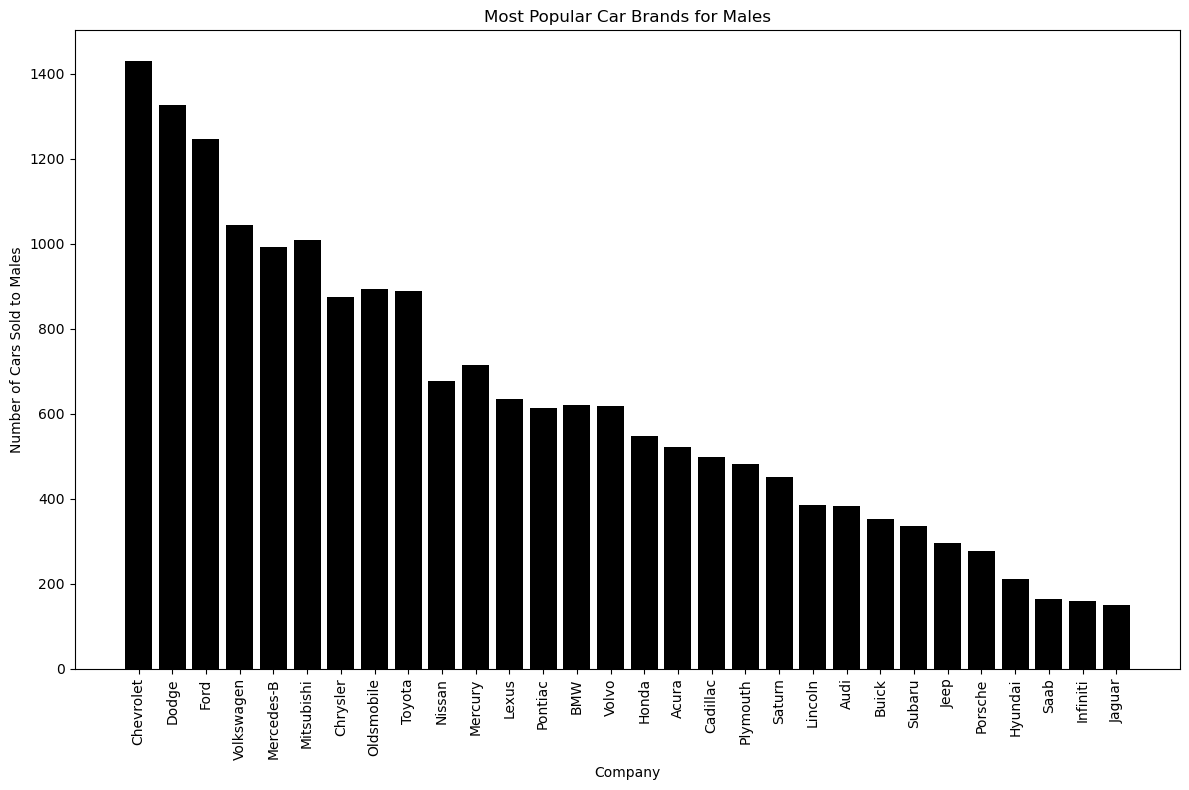

In [75]:
plt.figure(figsize=(12, 8))
plt.bar(combined_car_brands['Company'], combined_car_brands['Female_Count'], color='#505050')
plt.title('Most Popular Car Brands for Females')
plt.xlabel('Company')
plt.ylabel('Number of Cars Sold to Females')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(combined_car_brands['Company'], combined_car_brands['Male_Count'], color='#000000')
plt.title('Most Popular Car Brands for Males')
plt.xlabel('Company')
plt.ylabel('Number of Cars Sold to Males')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [76]:
female_data = data[data['Gender'] == 'Female'].groupby(['Company', 'Model']).size().reset_index(name='Count')

top_female_cars = female_data.sort_values(by='Count', ascending=False).groupby('Company').head(1)

top_female_cars['Gender'] = 'Female'

male_data = data[data['Gender'] == 'Male'].groupby(['Company', 'Model']).size().reset_index(name='Count')

top_male_cars = male_data.sort_values(by='Count', ascending=False).groupby('Company').head(1)

top_male_cars['Gender'] = 'Male'

top_female_cars.reset_index(drop=True, inplace=True)
top_male_cars.reset_index(drop=True, inplace=True)

top_female_cars = top_female_cars[['Gender', 'Company', 'Model', 'Count']]
top_male_cars = top_male_cars[['Gender', 'Company', 'Model', 'Count']]

top_female_cars.columns = [f'Female_{col}' if col != 'Gender' else col for col in top_female_cars.columns]
top_male_cars.columns = [f'Male_{col}' if col != 'Gender' else col for col in top_male_cars.columns]

combined_df = pd.concat([top_female_cars, top_male_cars], axis=1)
combined_df


,Gender,Female_Company,Female_Model,Female_Count,Gender,Male_Company,Male_Model,Male_Count
0,Female,Chevrolet,Prizm,98,Male,Oldsmobile,Silhouette,341
1,Female,Acura,RL,93,Male,Mitsubishi,Diamante,335
2,Female,Volkswagen,Jetta,85,Male,Dodge,Ram Pickup,314
3,Female,Mitsubishi,Diamante,83,Male,Chevrolet,Prizm,313
4,Female,Lexus,LS400,81,Male,Volkswagen,Passat,312
5,Female,Oldsmobile,Silhouette,70,Male,Acura,RL,279
6,Female,Chrysler,LHS,70,Male,Audi,A6,273
7,Female,Dodge,Ram Pickup,69,Male,Lexus,LS400,273
8,Female,BMW,528i,62,Male,BMW,528i,262
9,Female,Cadillac,Eldorado,62,Male,Chrysler,LHS,260


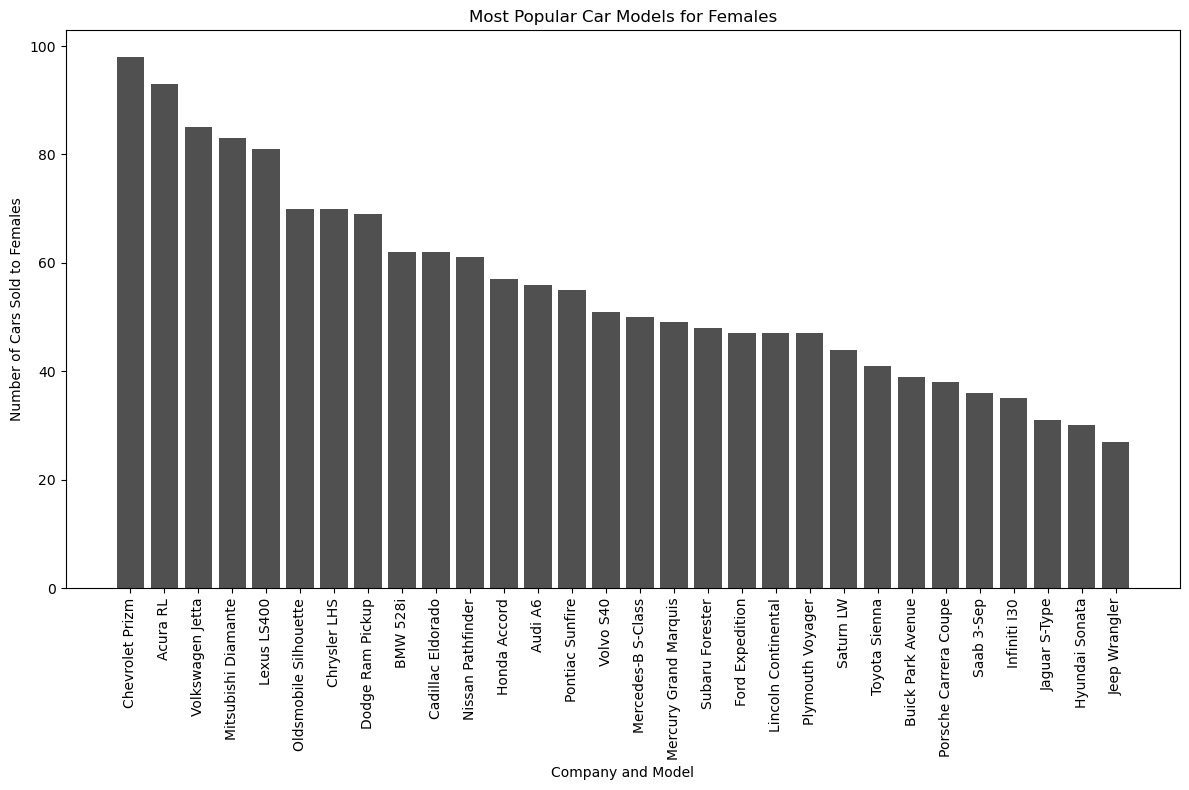

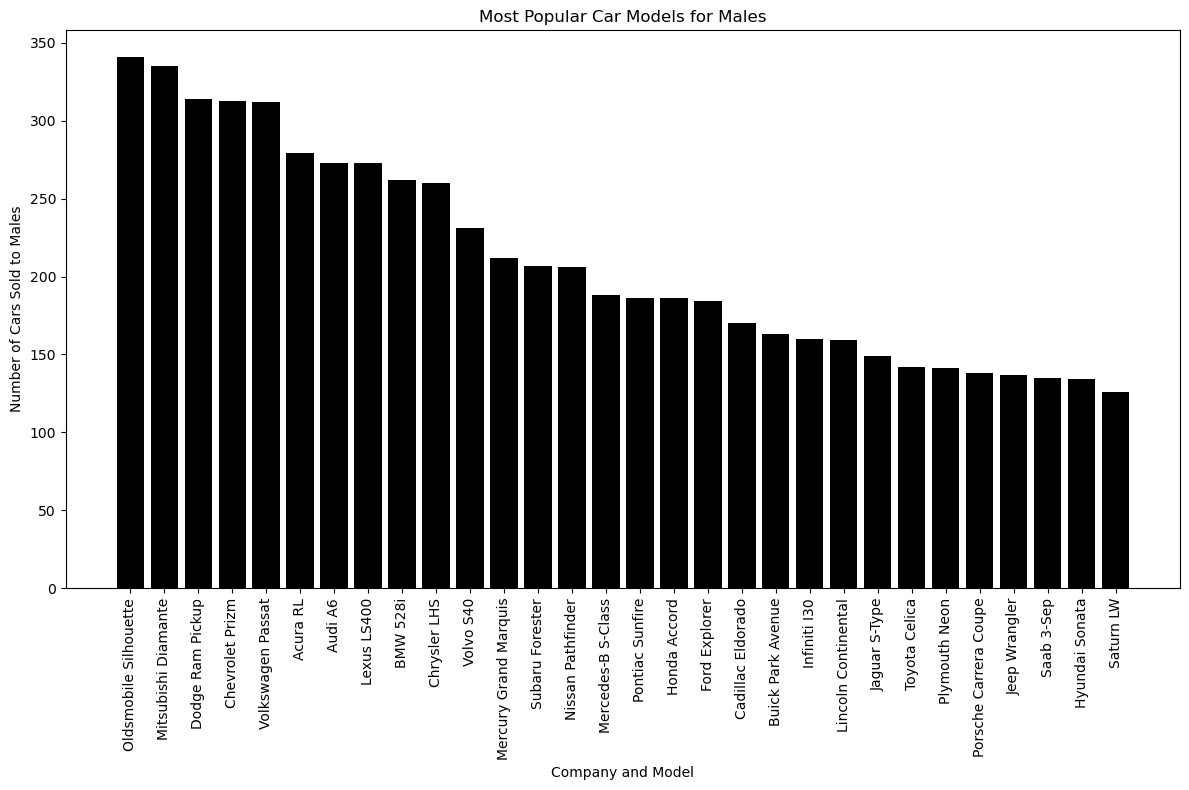

In [77]:
plt.figure(figsize=(12, 8))
plt.bar(combined_df['Female_Company'] + ' ' + combined_df['Female_Model'], combined_df['Female_Count'], color='#505050')
plt.title('Most Popular Car Models for Females')
plt.xlabel('Company and Model')
plt.ylabel('Number of Cars Sold to Females')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(combined_df['Male_Company'] + ' ' + combined_df['Male_Model'], combined_df['Male_Count'], color='#000000')
plt.title('Most Popular Car Models for Males')
plt.xlabel('Company and Model')
plt.ylabel('Number of Cars Sold to Males')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [78]:
female_body_style = data[data['Gender'] == 'Female'].groupby('Body Style').size().reset_index(name='Count')
top_female_body_style = female_body_style.sort_values(by='Count', ascending=False).head(5)

male_body_style = data[data['Gender'] == 'Male'].groupby('Body Style').size().reset_index(name='Count')
top_male_body_style = male_body_style.sort_values(by='Count', ascending=False).head(5)

top_female_body_style['Gender'] = 'Female'
top_male_body_style['Gender'] = 'Male'

top_body_style = pd.concat([top_female_body_style, top_male_body_style])

top_body_style.reset_index(drop=True, inplace=True)
top_body_style


,Body Style,Count,Gender
0,SUV,1335,Female
1,Hatchback,1298,Female
2,Sedan,945,Female
3,Passenger,883,Female
4,Hardtop,647,Female
5,SUV,5039,Male
6,Hatchback,4830,Male
7,Sedan,3543,Male
8,Passenger,3062,Male
9,Hardtop,2324,Male


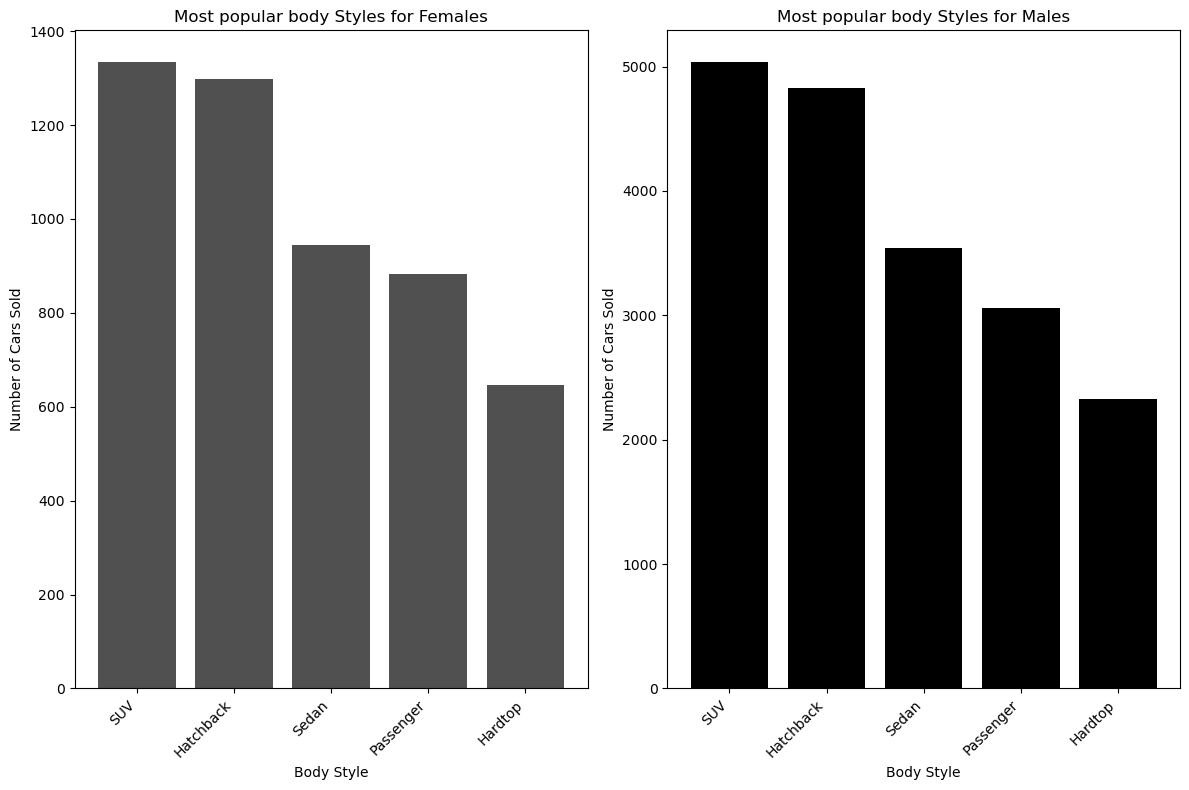

In [79]:
black_shades = ['#505050', '#000000']

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)  
female_body_style = top_body_style[top_body_style['Gender'] == 'Female']
plt.bar(female_body_style['Body Style'], female_body_style['Count'], color=black_shades[0])
plt.title('Most popular body Styles for Females')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)  
male_body_style = top_body_style[top_body_style['Gender'] == 'Male']
plt.bar(male_body_style['Body Style'], male_body_style['Count'], color=black_shades[1])
plt.title('Most popular body Styles for Males')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [80]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Group
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Very Low Income
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High Income
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,High Income
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Very Low Income
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,High Income


In [81]:
female_colors = data[data['Gender'] == 'Female'].groupby('Color').size().reset_index(name='Female_Count')

male_colors = data[data['Gender'] == 'Male'].groupby('Color').size().reset_index(name='Male_Count')

combined_colors = pd.merge(female_colors, male_colors, on='Color', how='outer')

combined_colors.fillna(0, inplace=True)

combined_colors['Total_Count'] = combined_colors['Female_Count'] + combined_colors['Male_Count']

combined_colors = combined_colors.sort_values(by='Total_Count', ascending=False)

combined_colors


,Color,Female_Count,Male_Count,Total_Count
1,Pale White,2448,8808,11256
0,Black,1653,6204,7857
2,Red,1007,3786,4793


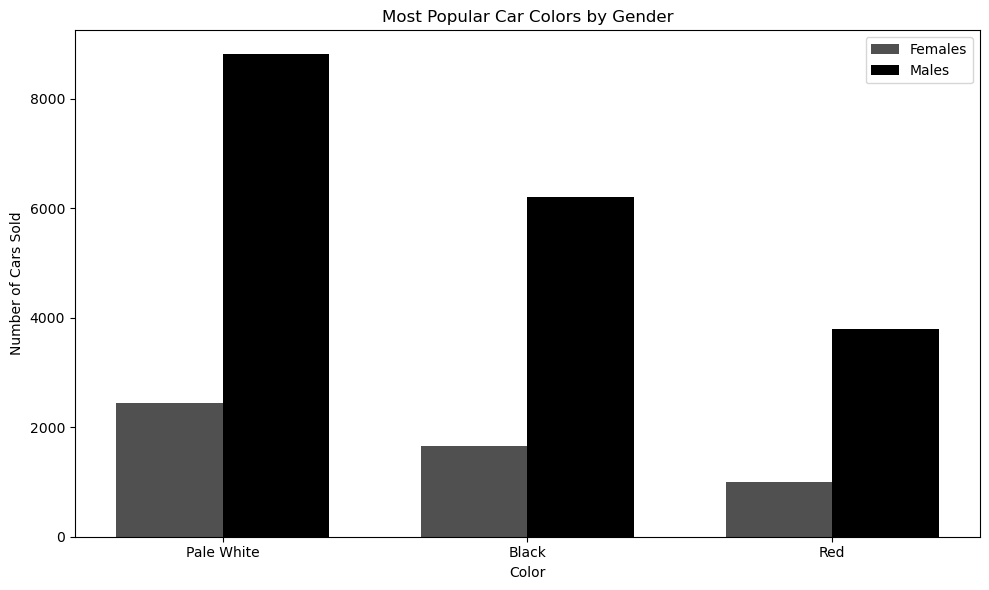

In [82]:
bar_width = 0.35
index = np.arange(len(combined_colors['Color']))

plt.figure(figsize=(10, 6))

plt.bar(index, combined_colors['Female_Count'], bar_width, label='Females', color='#505050')

plt.bar(index + bar_width, combined_colors['Male_Count'], bar_width, label='Males', color='#000000')

plt.xlabel('Color')
plt.ylabel('Number of Cars Sold')
plt.title('Most Popular Car Colors by Gender')
plt.xticks(index + bar_width / 2, combined_colors['Color'])
plt.legend()
plt.tight_layout()
plt.show()


# Task 4 Summary

The analysis shows that customer gender does influence car purchasing choices, with noticeable differences in the preferences for car models, brands, body types, and colors between men and women. Among women, popular brands like Chevrolet, Acura, and Volkswagen stand out, with the Chevrolet Prizm being the top choice. Other favored models include the Acura RL and Volkswagen Jetta, indicating a preference for smaller, compact cars. On the other hand, men overwhelmingly prefer brands like Oldsmobile, Mitsubishi, and Dodge, with models such as the Oldsmobile Silhouette and Mitsubishi Diamante leading in sales. Larger vehicles like the Dodge Ram Pickup also rank highly among male buyers.

In terms of body types, SUVs dominate for both genders, but men tend to purchase them in much larger quantities, with nearly 5,000 SUVs sold to men compared to around 1,300 to women. Hatchbacks and sedans also show strong popularity among both men and women, though again, the volume of purchases is higher among men.

Color preferences reveal an interesting pattern, with Pale White being the most popular color for both men and women, though men purchased significantly more white cars than women. Black is another favored color, especially for men, while Red remains the least popular color across both genders.

Overall, the data indicates that while there are shared preferences between men and women, such as the popularity of SUVs and certain mainstream car brands, men tend to prefer larger vehicles and neutral colors like white and black, while women exhibit a more balanced distribution in their choices across models, body types, and colors.

# Fifth task

How does a customer's income affect their choice of car?

Is there a correlation between income and the price of a car?

How does customer income affect the choice of brand, model, color or body type?

In [83]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Group
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Very Low Income
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High Income
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,High Income
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Very Low Income
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,High Income


In [84]:
correlation = data['Annual Income'].corr(data['Price ($)'], method='pearson')

print(f"Correlation between Annual Income and Price: {correlation}")


Correlation between Annual Income and Price: 0.012064959420296463


In [85]:
bins = [10000, 100000, 500000, 1000000, 5000000, 11200000]
labels = ['Very Low Income', 'Low Income', 'Middle Income', 'High Income', 'Very High Income']
data['Income Group'] = pd.cut(data['Annual Income'], bins=bins, labels=labels, right=False)

income_group_analysis = data.groupby(['Income Group', 'Company', 'Model', 'Color', 'Body Style']).size().reset_index(name='Count')

income_group_analysis.head()

,Income Group,Company,Model,Color,Body Style,Count
0,Very Low Income,Acura,3-Sep,Black,Hardtop,0
1,Very Low Income,Acura,3-Sep,Black,Hatchback,0
2,Very Low Income,Acura,3-Sep,Black,Passenger,0
3,Very Low Income,Acura,3-Sep,Black,SUV,0
4,Very Low Income,Acura,3-Sep,Black,Sedan,0


In [86]:
income_group_analysis

,Income Group,Company,Model,Color,Body Style,Count
0,Very Low Income,Acura,3-Sep,Black,Hardtop,0
1,Very Low Income,Acura,3-Sep,Black,Hatchback,0
2,Very Low Income,Acura,3-Sep,Black,Passenger,0
3,Very Low Income,Acura,3-Sep,Black,SUV,0
4,Very Low Income,Acura,3-Sep,Black,Sedan,0
...,...,...,...,...,...,...
346495,Very High Income,Volvo,Xterra,Red,Hardtop,0
346496,Very High Income,Volvo,Xterra,Red,Hatchback,0
346497,Very High Income,Volvo,Xterra,Red,Passenger,0
346498,Very High Income,Volvo,Xterra,Red,SUV,0


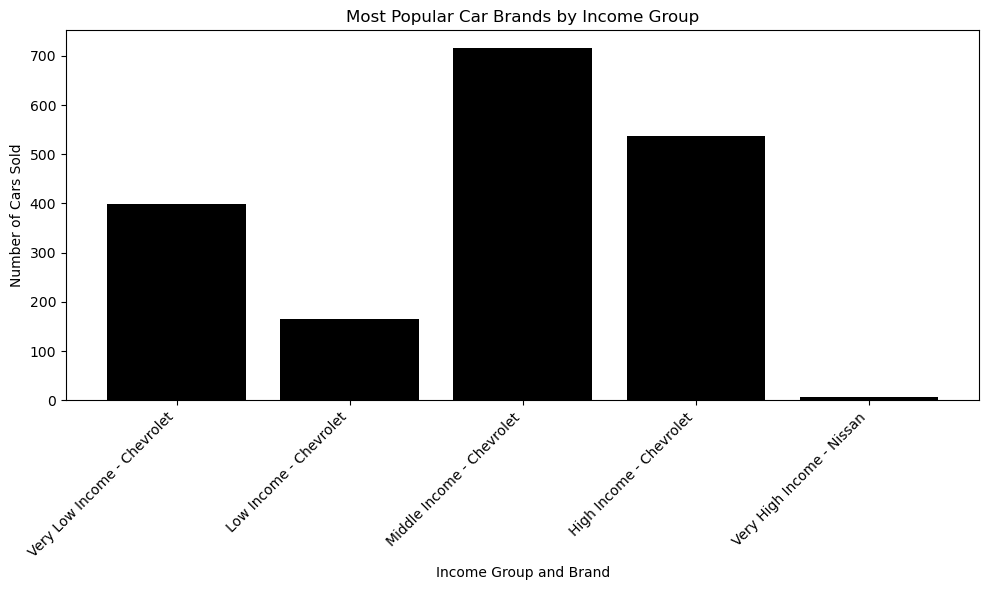

In [107]:
popular_brands_by_income_group = income_group_analysis[income_group_analysis['Count'] > 0].groupby(['Income Group', 'Company']).sum().reset_index()

top_brands_by_income_group = popular_brands_by_income_group.loc[popular_brands_by_income_group.groupby('Income Group')['Count'].idxmax()]

top_brands_by_income_group['Income Group'] = top_brands_by_income_group['Income Group'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(top_brands_by_income_group['Income Group'] + ' - ' + top_brands_by_income_group['Company'], top_brands_by_income_group['Count'], color='black')

plt.title('Most Popular Car Brands by Income Group')
plt.xlabel('Income Group and Brand')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


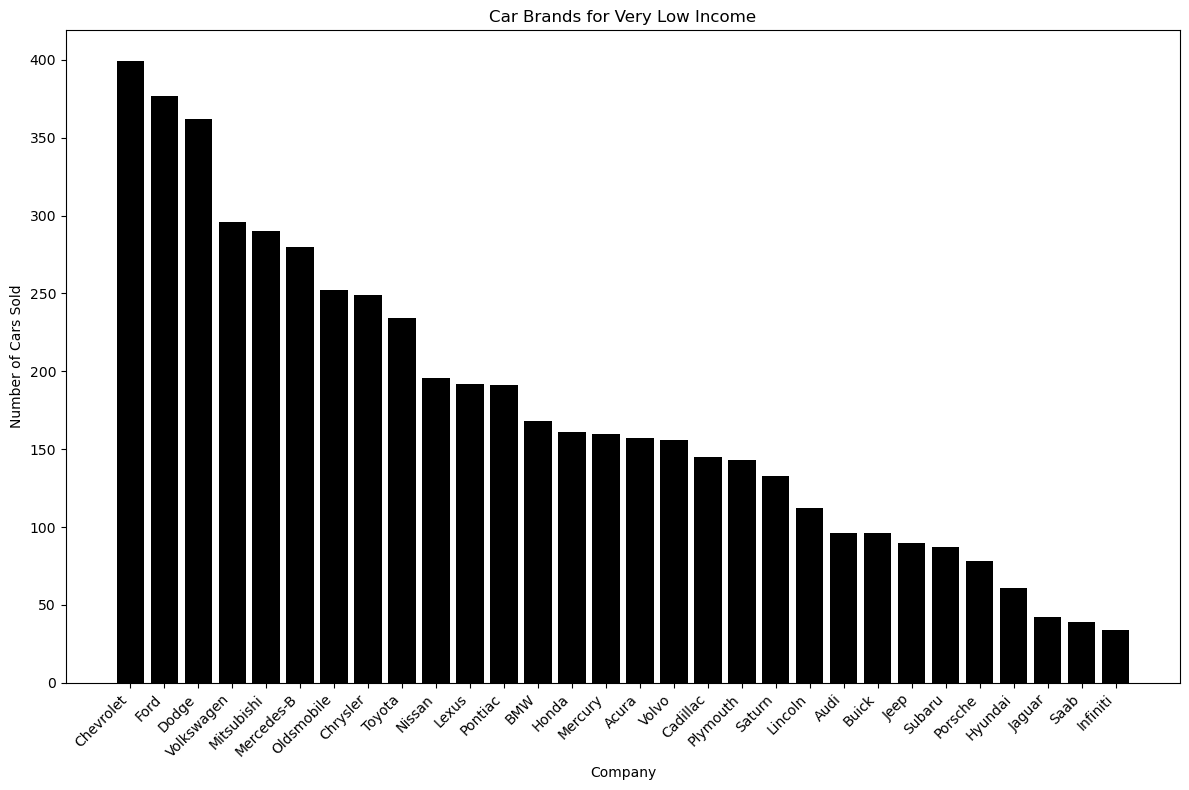

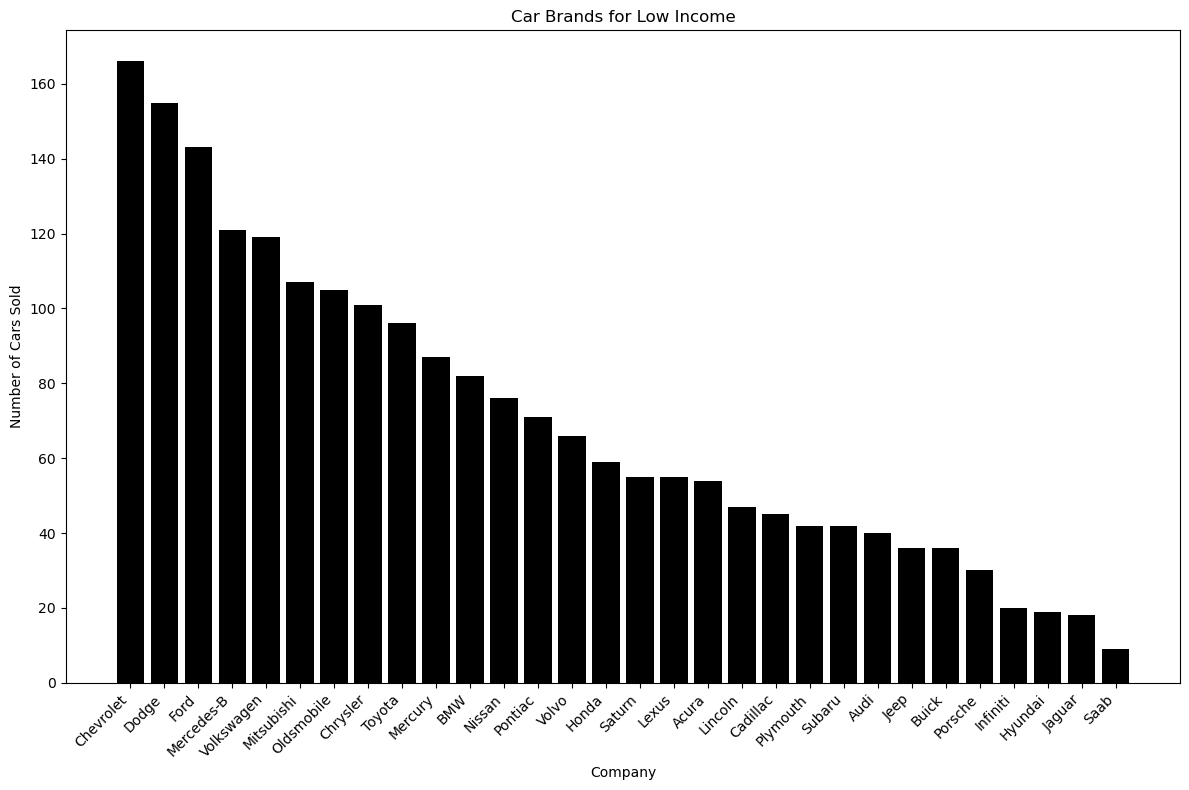

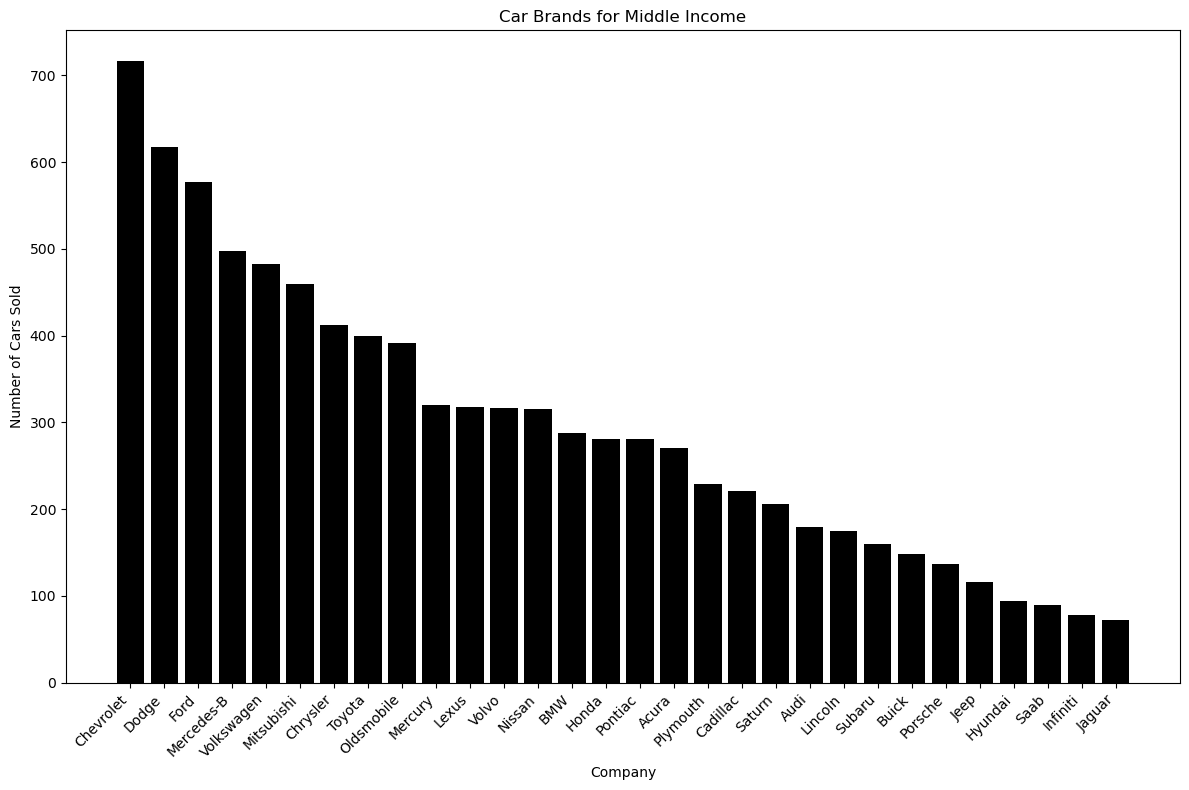

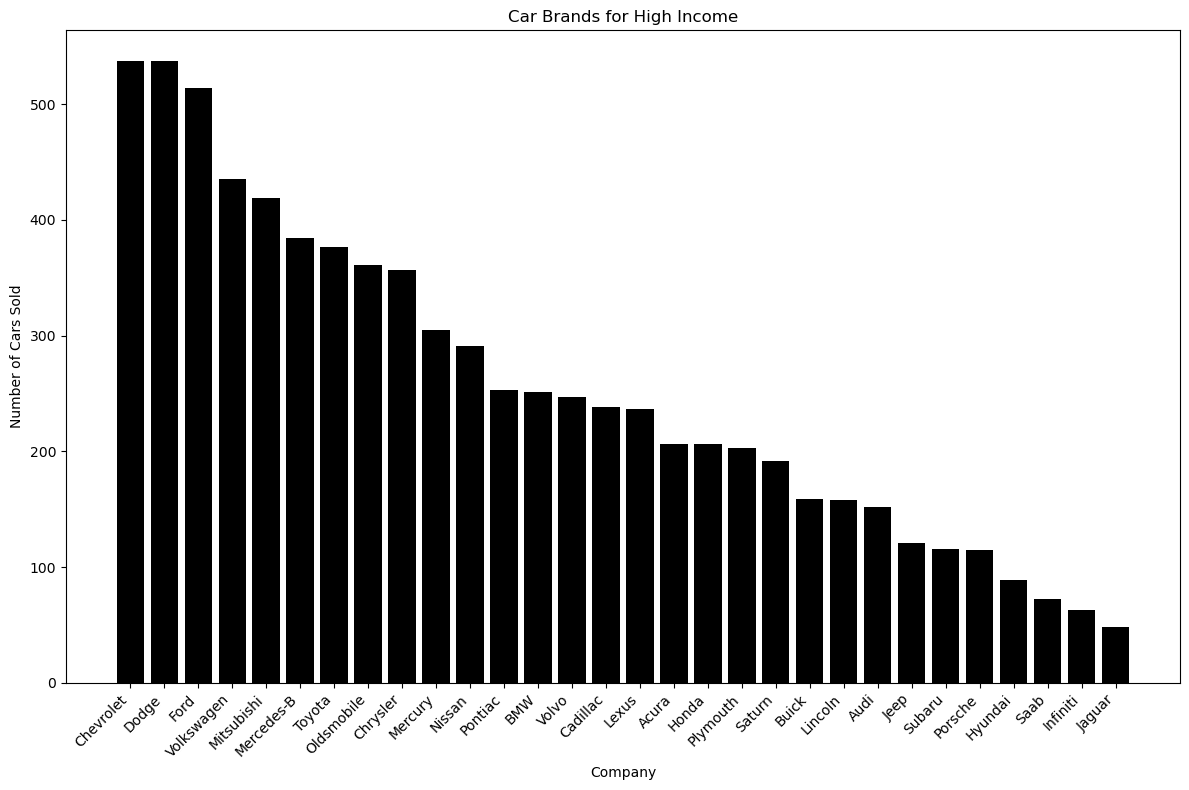

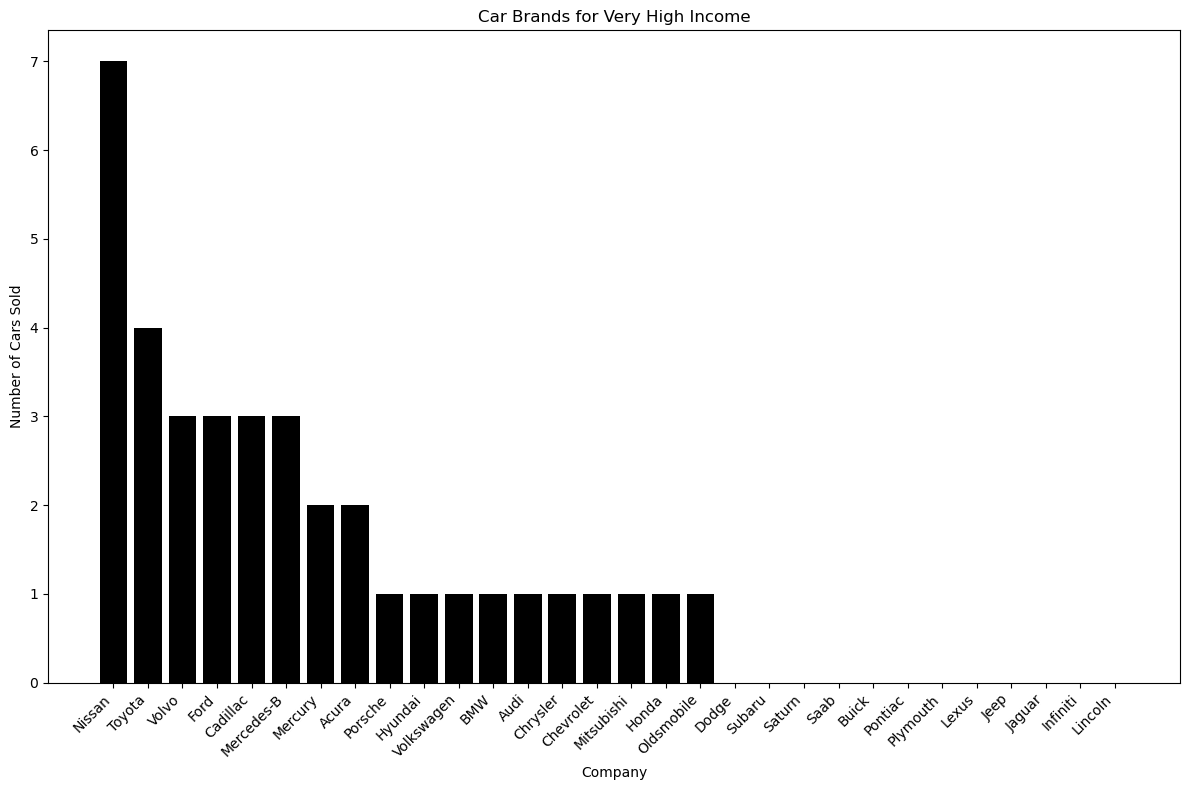

In [108]:
all_brands_by_income_group = income_group_analysis[income_group_analysis['Count'] > 0].groupby(['Income Group', 'Company']).sum().reset_index()

income_groups = all_brands_by_income_group['Income Group'].unique()

for income_group in income_groups:
    group_data = all_brands_by_income_group[all_brands_by_income_group['Income Group'] == income_group]

    group_data = group_data.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(group_data['Company'], group_data['Count'], color='#000000')

    plt.title(f'Car Brands for {income_group}')
    plt.xlabel('Company')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()


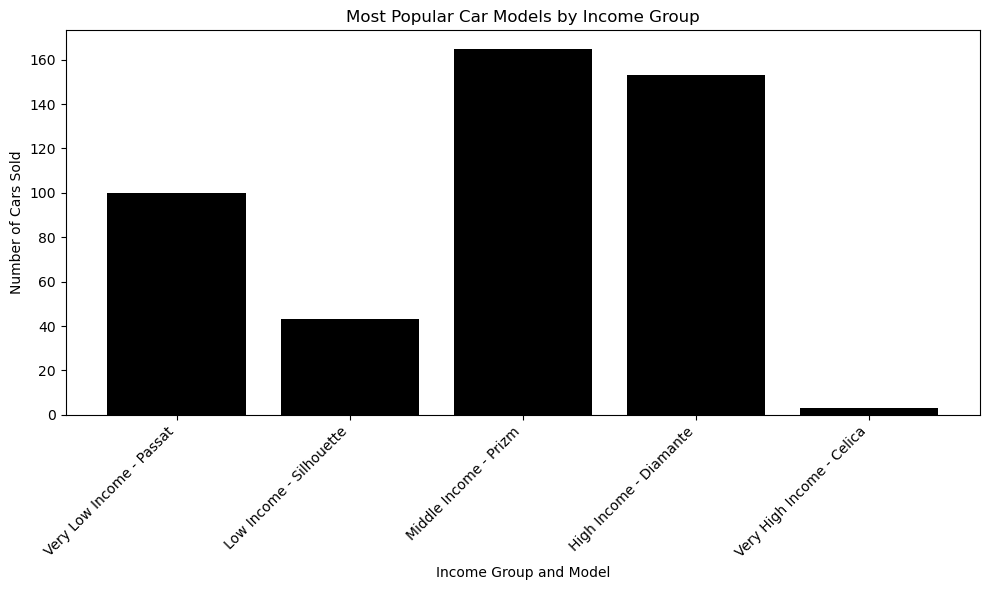

In [87]:
popular_models_by_income_group = income_group_analysis[income_group_analysis['Count'] > 0].groupby(['Income Group', 'Model']).sum().reset_index()

top_models_by_income_group = popular_models_by_income_group.loc[popular_models_by_income_group.groupby('Income Group')['Count'].idxmax()]

top_models_by_income_group['Income Group'] = top_models_by_income_group['Income Group'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(top_models_by_income_group['Income Group'] + ' - ' + top_models_by_income_group['Model'], top_models_by_income_group['Count'], color='black')

plt.title('Most Popular Car Models by Income Group')
plt.xlabel('Income Group and Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


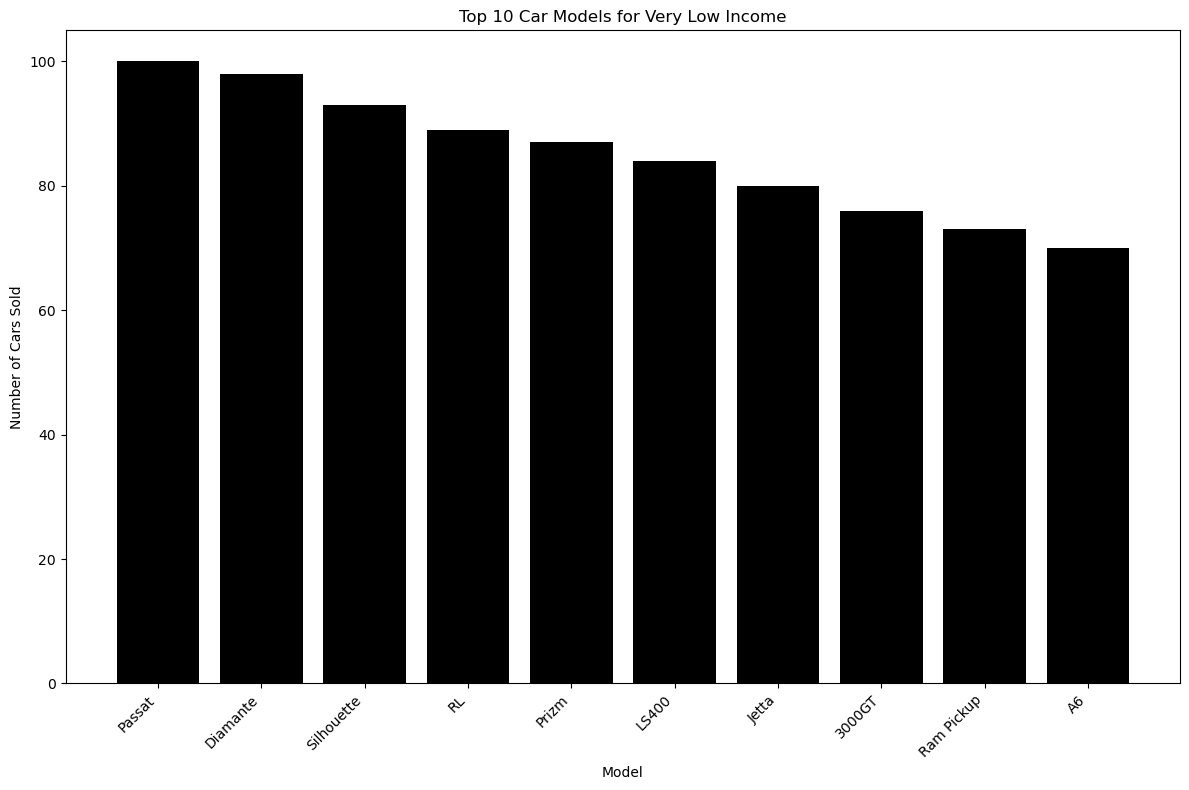

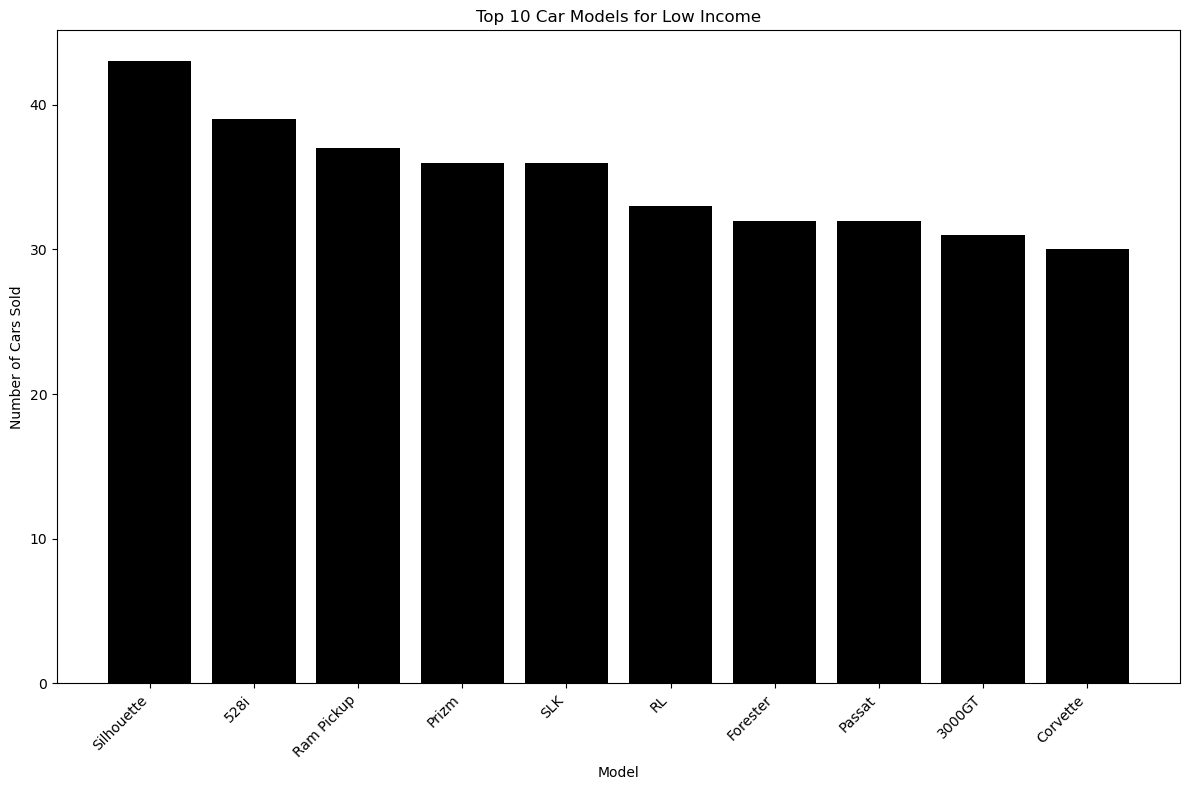

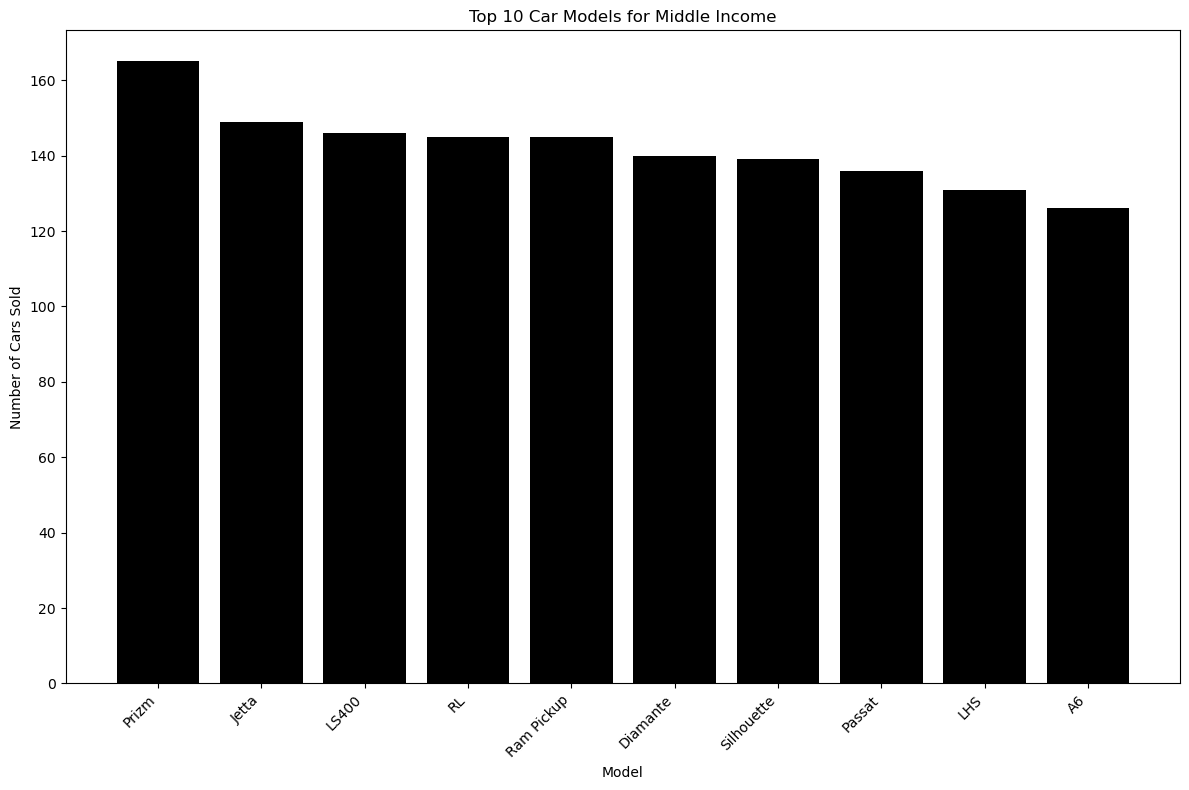

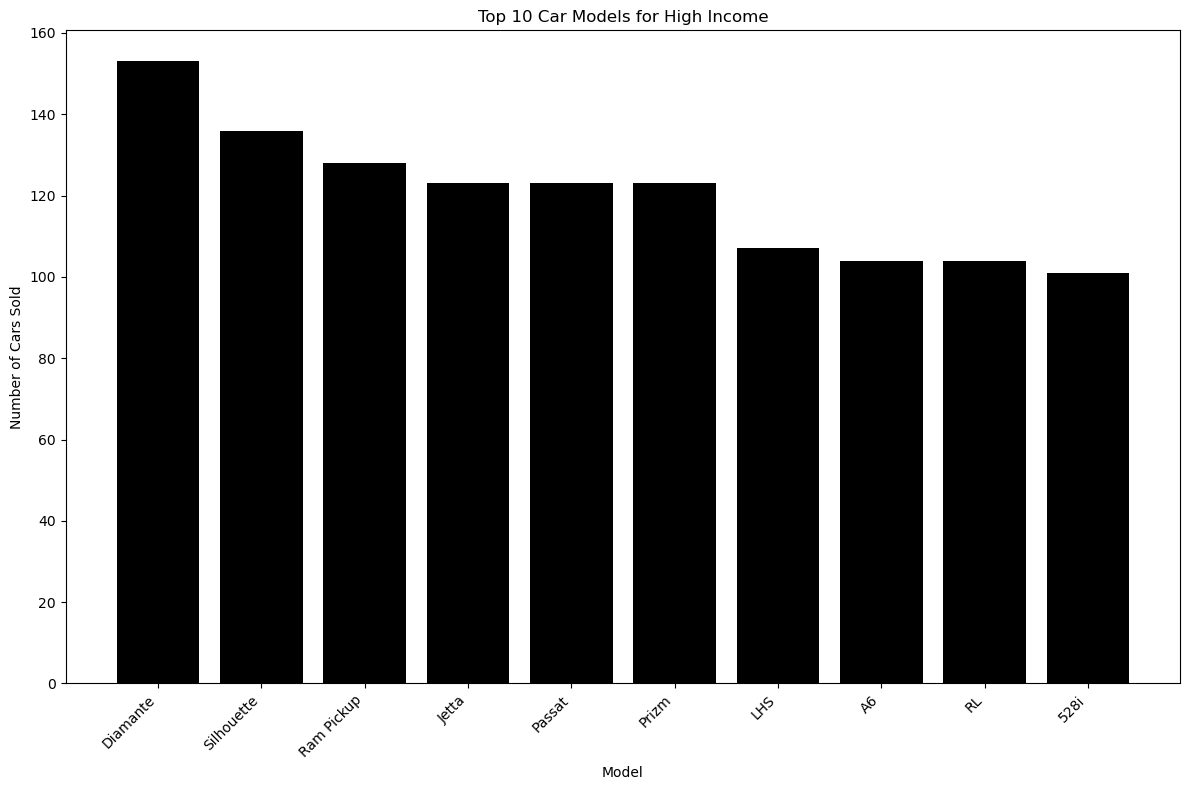

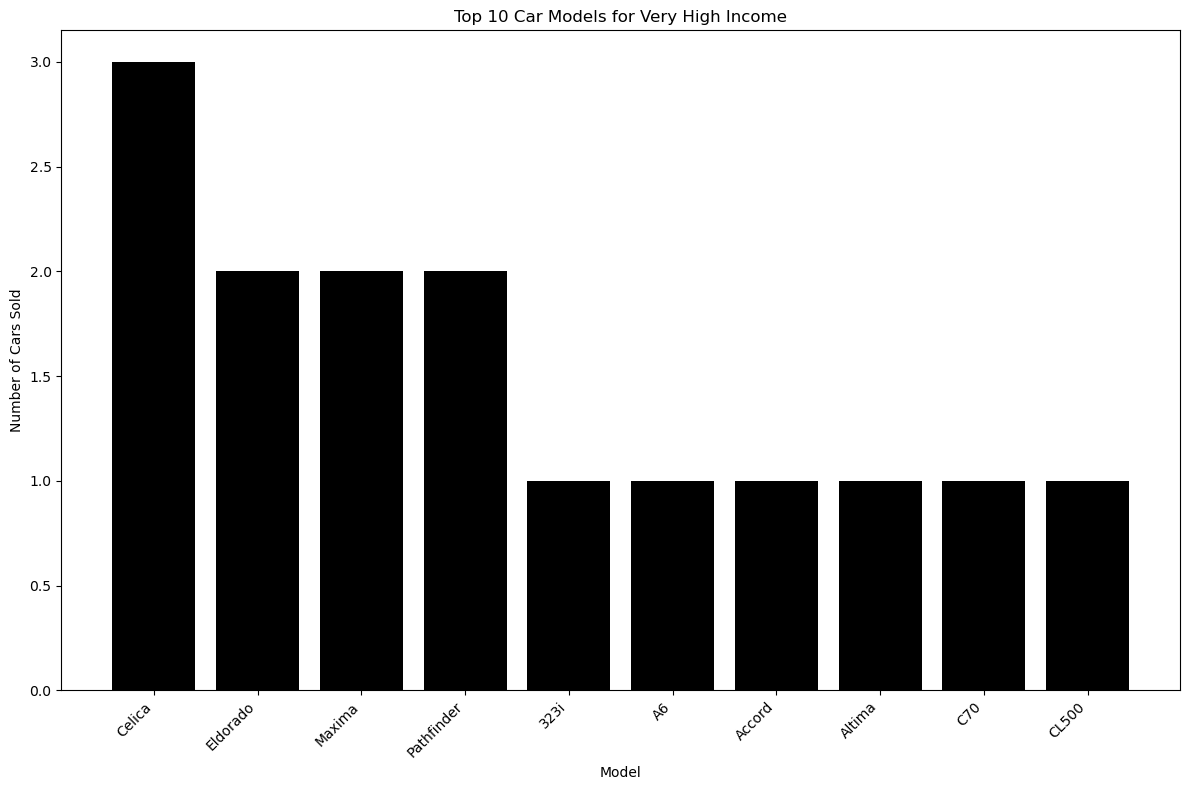

In [110]:
top_models_by_income_group = income_group_analysis[income_group_analysis['Count'] > 0].groupby(['Income Group', 'Model']).sum().reset_index()

top_10_models_by_income_group = top_models_by_income_group.groupby('Income Group').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)

income_groups = top_10_models_by_income_group['Income Group'].unique()

for income_group in income_groups:
    group_data = top_10_models_by_income_group[top_10_models_by_income_group['Income Group'] == income_group]
    
    plt.figure(figsize=(12, 8))
    plt.bar(group_data['Model'], group_data['Count'], color='#000000')
    
    plt.title(f'Top 10 Car Models for {income_group}')
    plt.xlabel('Model')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    
    plt.show()


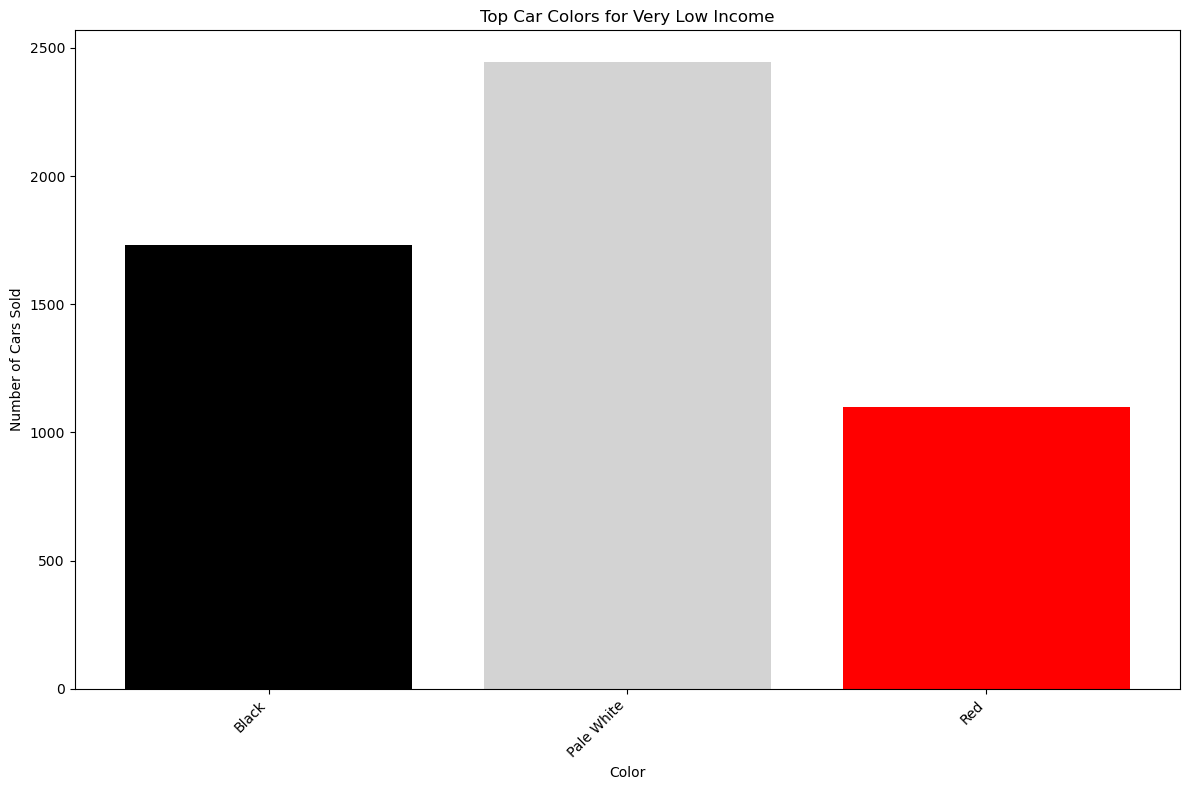

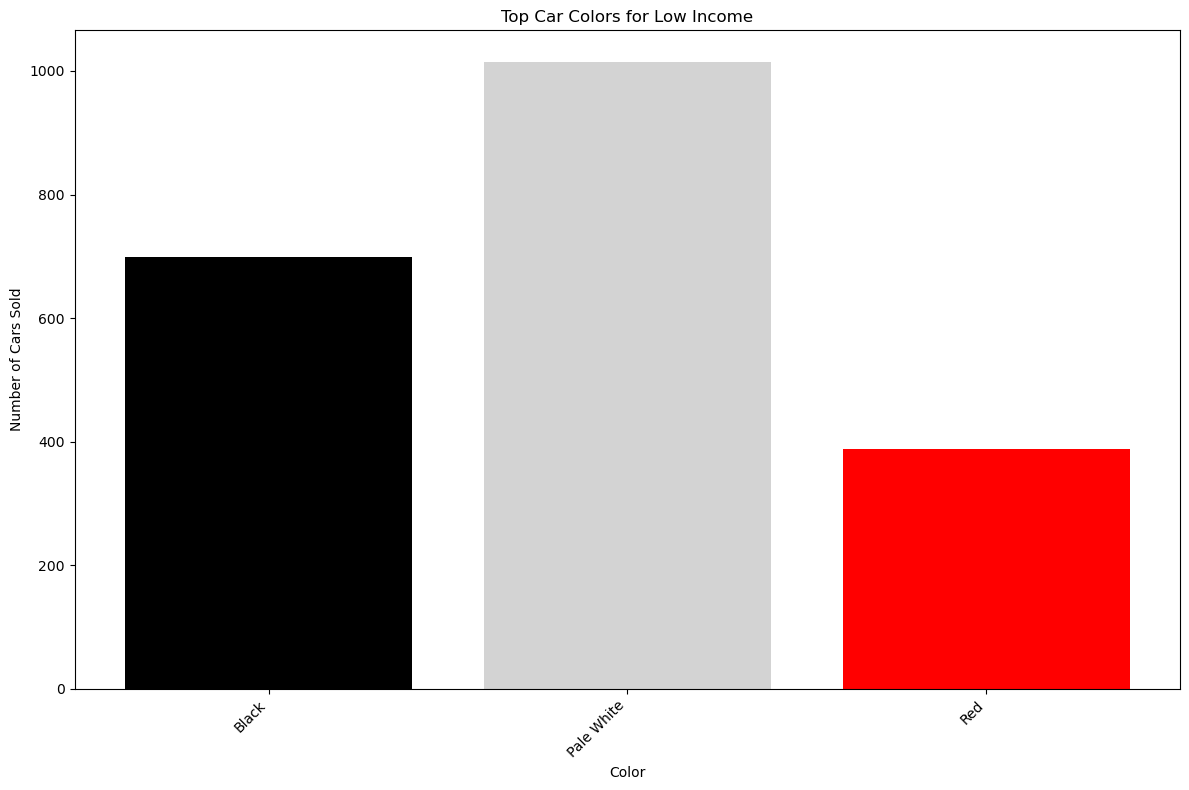

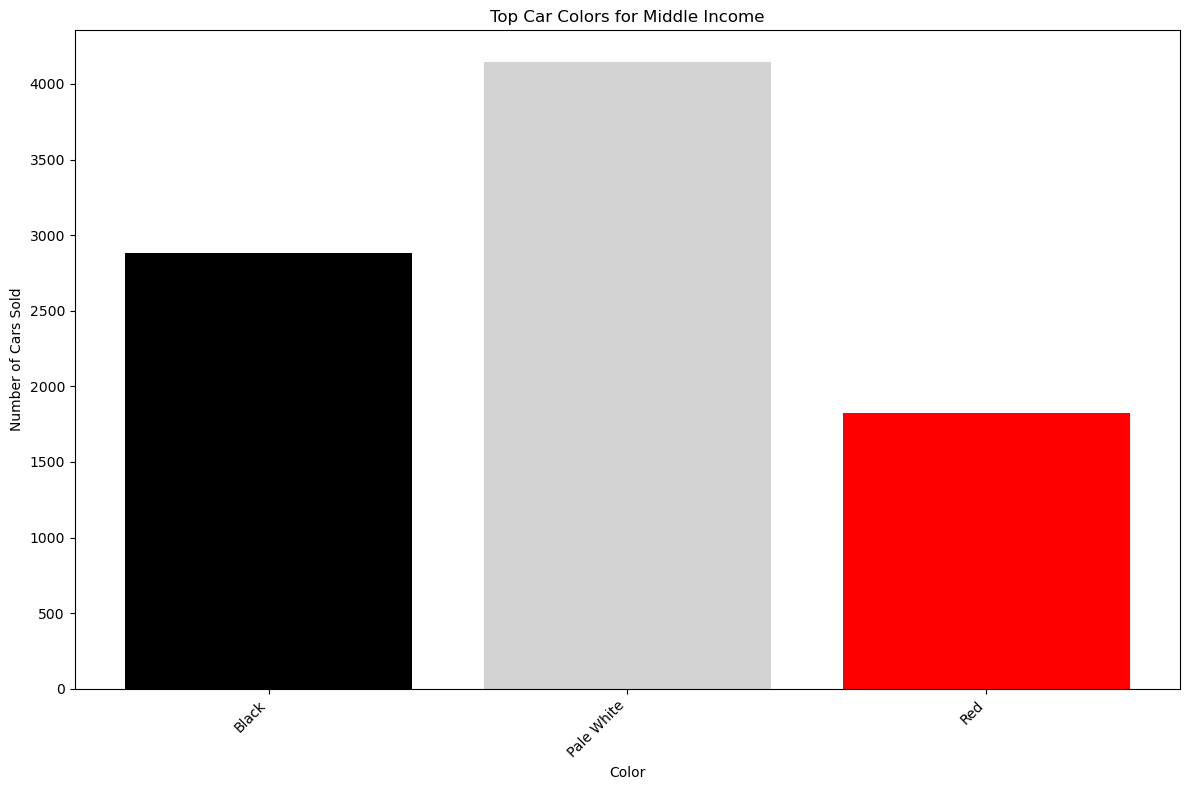

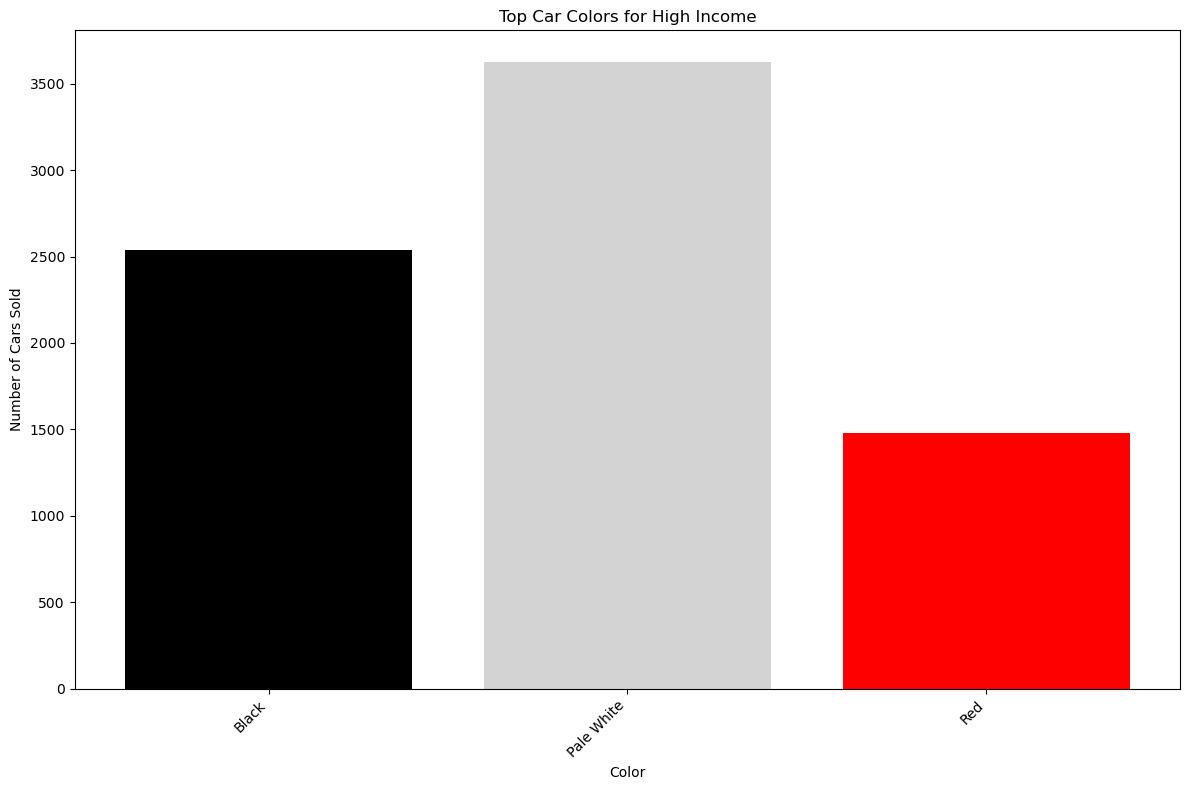

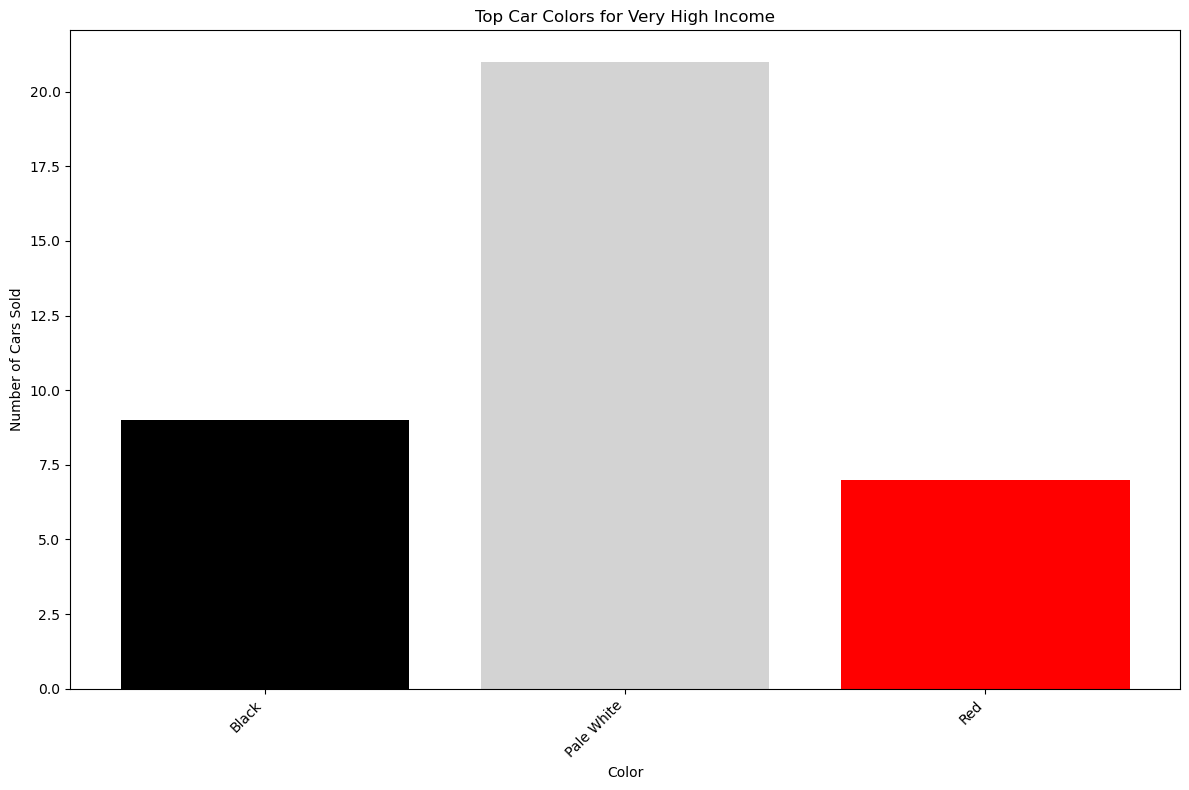

In [113]:
top_colors_by_income_group = income_group_analysis[income_group_analysis['Count'] > 0].groupby(['Income Group', 'Color']).sum().reset_index()

top_colors_by_income_group = top_colors_by_income_group[top_colors_by_income_group['Color'].isin(['Red', 'Black', 'Pale White'])]

income_groups = top_colors_by_income_group['Income Group'].unique()

for income_group in income_groups:
    group_data = top_colors_by_income_group[top_colors_by_income_group['Income Group'] == income_group]
    
    plt.figure(figsize=(12, 8))
    plt.bar(group_data['Color'], group_data['Count'], color=['black','lightgray', 'red',])

    plt.title(f'Top Car Colors for {income_group}')
    plt.xlabel('Color')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    
    plt.show()


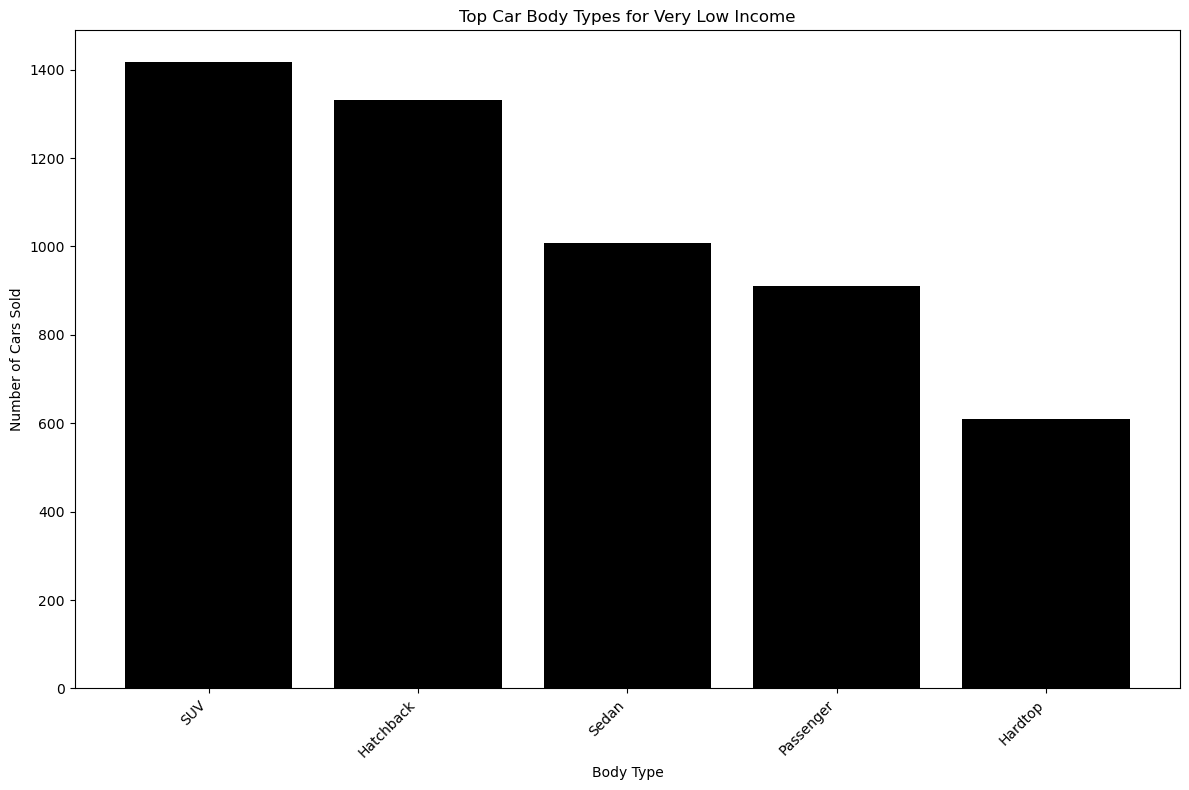

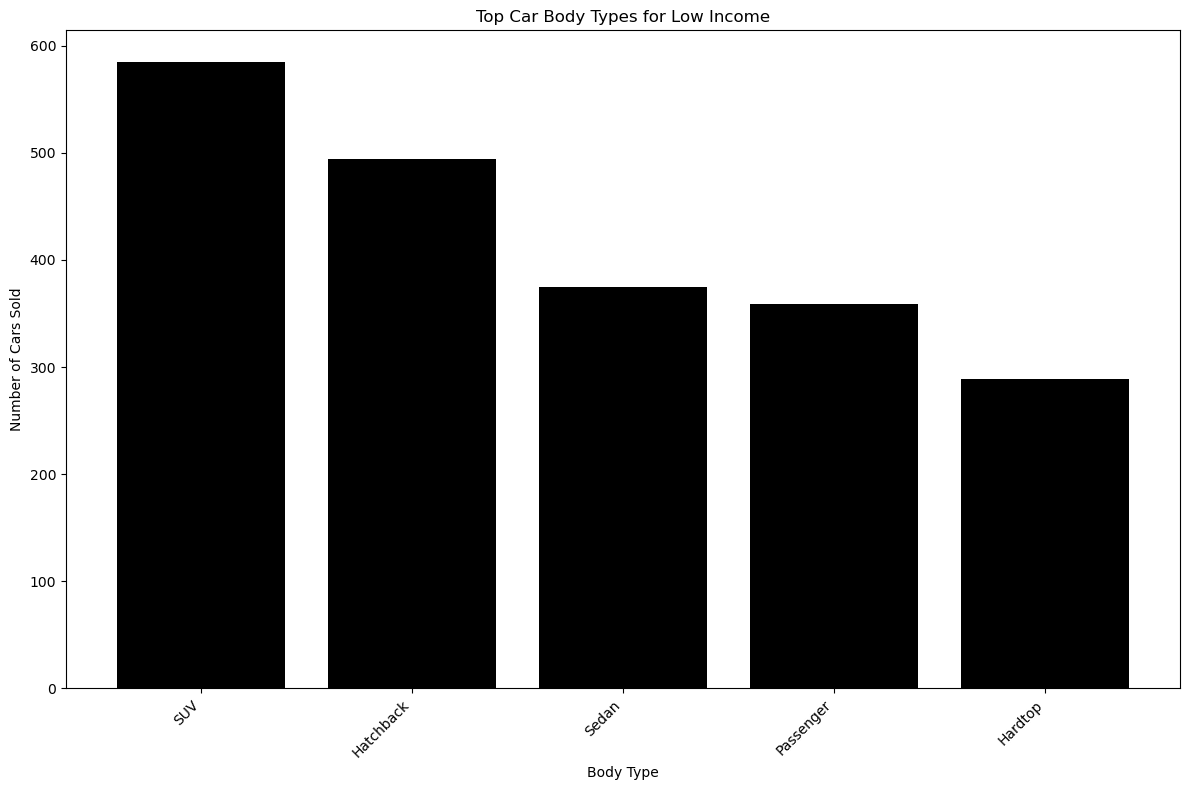

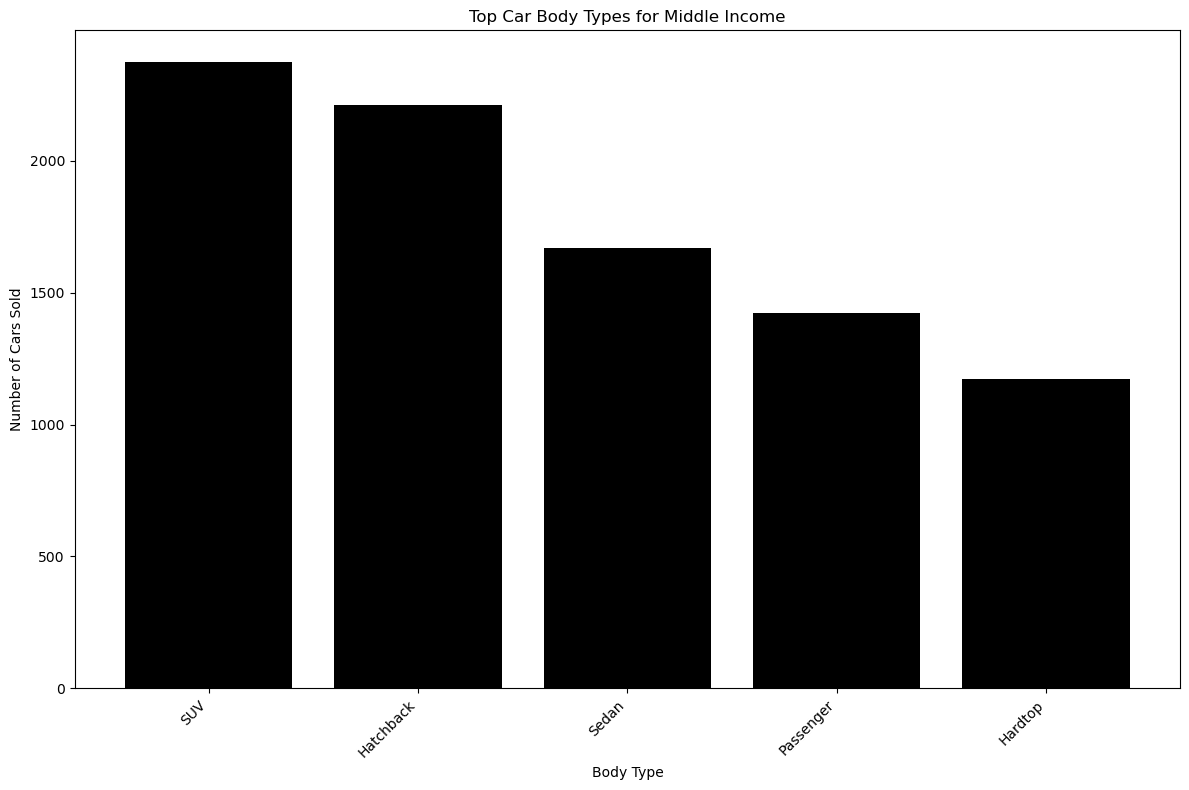

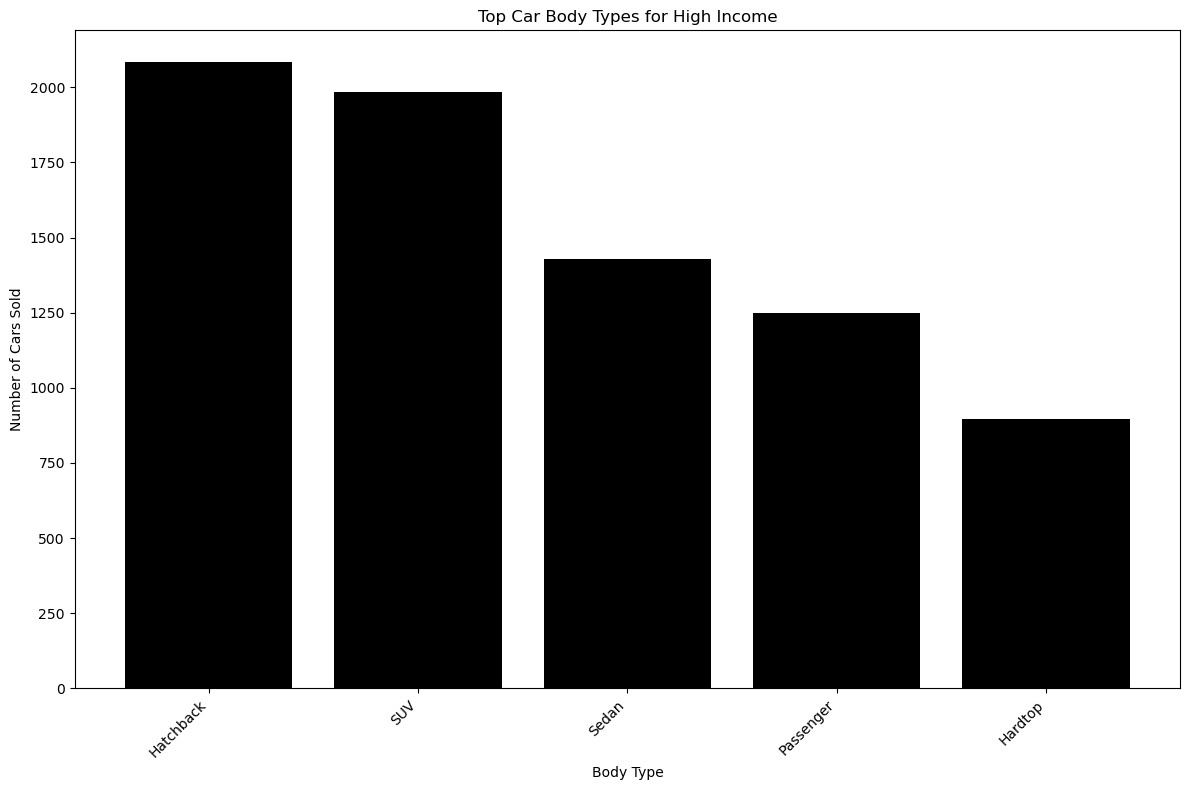

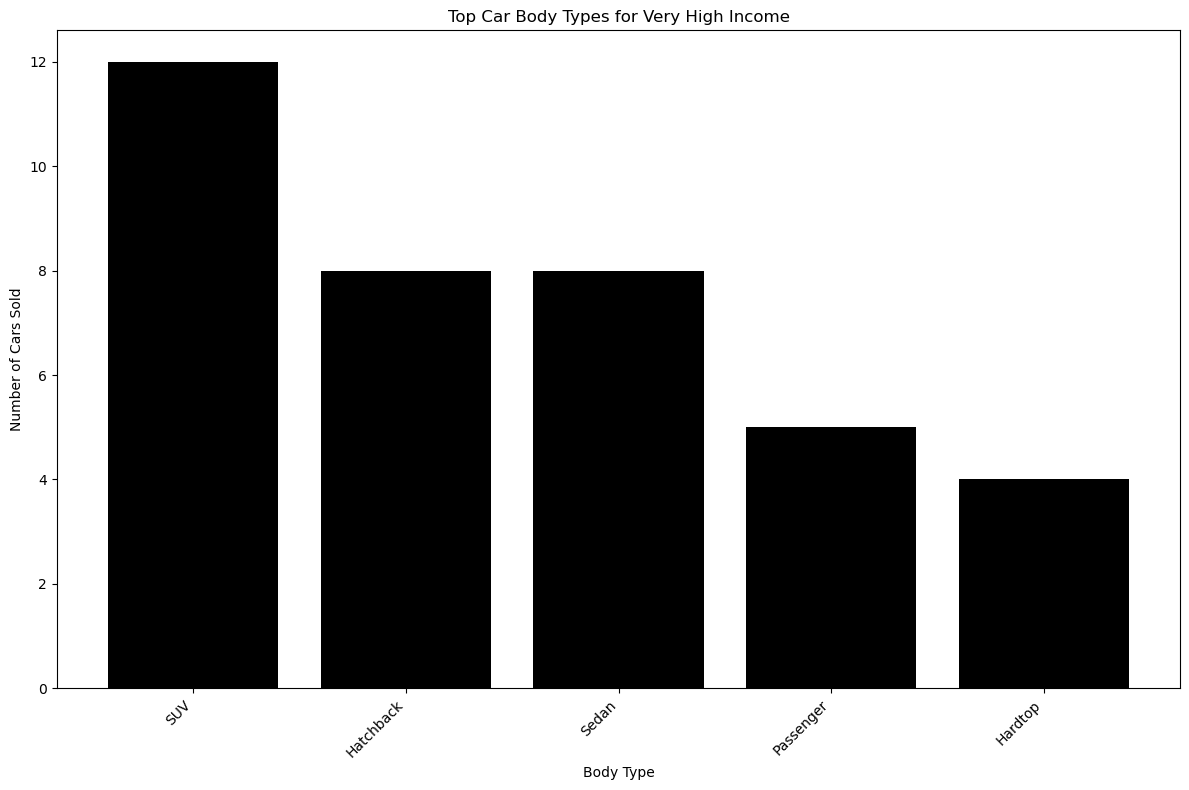

In [117]:
top_body_types_by_income_group = income_group_analysis[income_group_analysis['Count'] > 0].groupby(['Income Group', 'Body Style']).sum().reset_index()

income_groups = top_body_types_by_income_group['Income Group'].unique()

for income_group in income_groups:
    group_data = top_body_types_by_income_group[top_body_types_by_income_group['Income Group'] == income_group]
    
    group_data = group_data.sort_values(by='Count', ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.bar(group_data['Body Style'], group_data['Count'], color='#000000')
    
    plt.title(f'Top Car Body Types for {income_group}')
    plt.xlabel('Body Type')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    
    plt.show()


# Task 5 Summary 

The analysis shows that customer income influences the choice of car brand, model, color, and body type, with distinct preferences across income levels. Higher-income groups tend to select premium brands and models, while lower-income customers prefer more affordable, widely available brands; Chevrolet, for example, is popular across various income levels, but premium models appeal more to higher-income customers. Color choices like Black, Red, and Pale White are consistent across income groups, suggesting that aesthetic preferences rather than income drive color selection. There is a noticeable difference in body type preferences, as higher-income groups favor luxury SUVs and sedans, while lower-income customers opt for practical hatchbacks and compact cars. The correlation between annual income and car price is very weak (0.012), indicating that while income influences preferences for certain car characteristics, it does not significantly affect the car's price, suggesting that brand perception, lifestyle, and personal preferences play important roles in car selection.

# Sixth Task

How does the sales region affect customer choices?

Do customers from different regions choose different brands, models,body types?


In [88]:
unique_regions = data['Dealer_Region'].unique()

print(f"Unikalne regiony: {unique_regions}")

Unikalne regiony: ['Middletown' 'Aurora' 'Greenville' 'Pasco' 'Janesville' 'Scottsdale'
 'Austin']


In [123]:

region_company_model_counts = data.groupby(['Dealer_Region', 'Company', 'Model']).size().reset_index(name='Count')

top_5_by_region = region_company_model_counts.sort_values(by='Count', ascending=False).groupby('Dealer_Region').head(10)

top_5_by_region.reset_index(drop=True, inplace=True)
top_5_by_region


,Dealer_Region,Company,Model,Count
0,Austin,Chevrolet,Prizm,96
1,Austin,Dodge,Ram Pickup,82
2,Janesville,Chevrolet,Prizm,81
3,Janesville,Oldsmobile,Silhouette,81
4,Austin,Mitsubishi,Montero Sport,77
...,...,...,...,...
65,Middletown,Acura,TL,42
66,Aurora,Lexus,LS400,42
67,Pasco,Chrysler,LHS,42
68,Pasco,Volkswagen,Jetta,42


In [124]:
sorted_top_5_by_region = top_5_by_region.sort_values(by=['Dealer_Region', 'Count'], ascending=[True, False])

sorted_top_5_by_region.reset_index(drop=True, inplace=True)
sorted_top_5_by_region


,Dealer_Region,Company,Model,Count
0,Aurora,Mitsubishi,Diamante,64
1,Aurora,Volkswagen,Jetta,60
2,Aurora,Oldsmobile,Silhouette,54
3,Aurora,Acura,RL,52
4,Aurora,Volkswagen,Passat,52
...,...,...,...,...
65,Scottsdale,Lexus,LS400,61
66,Scottsdale,Volkswagen,Jetta,59
67,Scottsdale,BMW,528i,58
68,Scottsdale,Chrysler,LHS,45


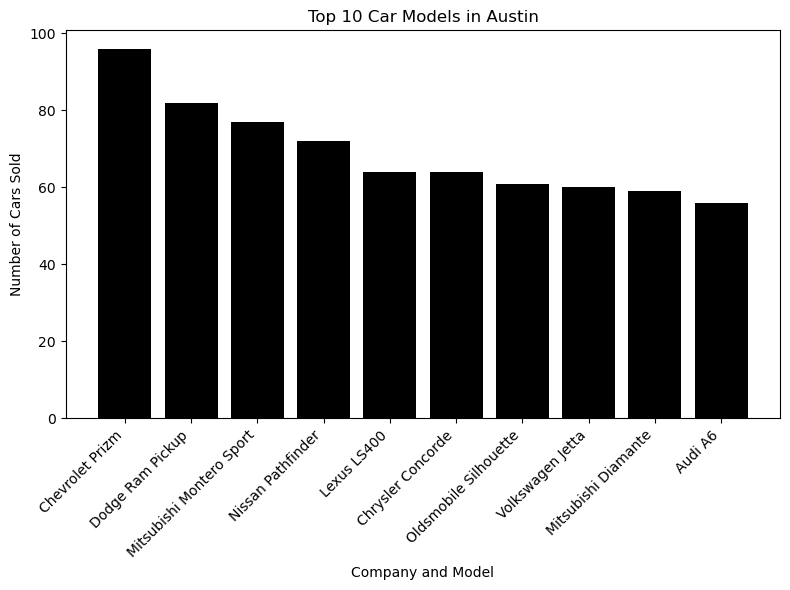

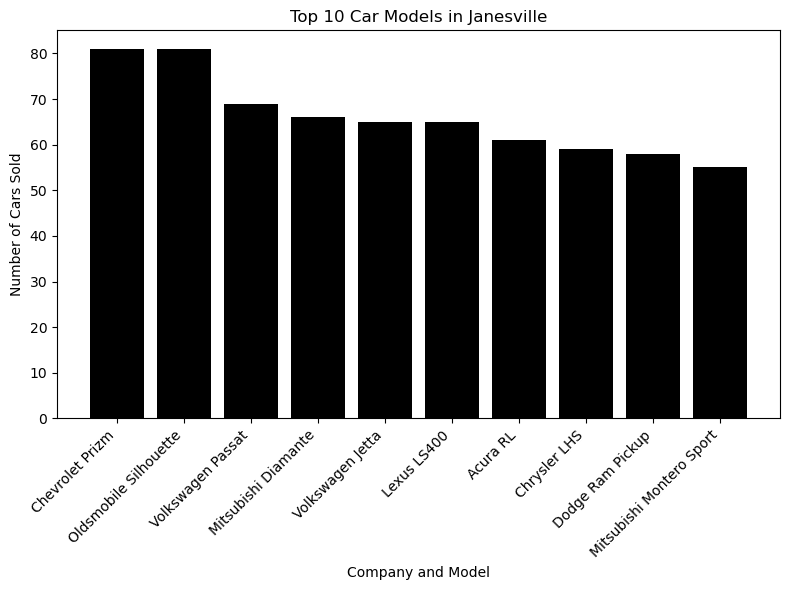

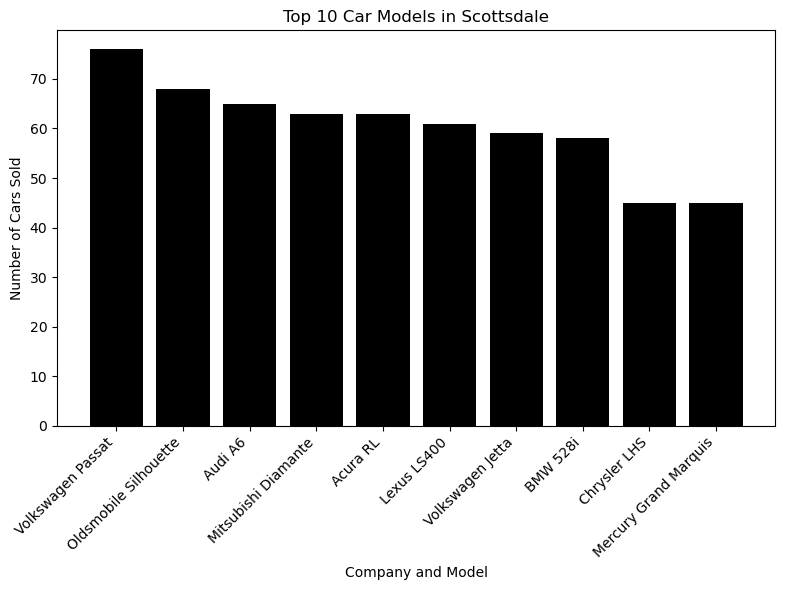

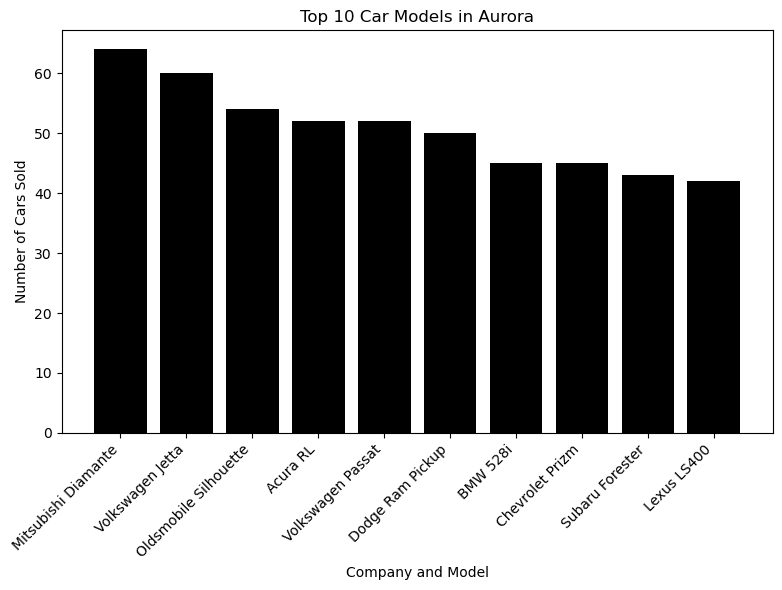

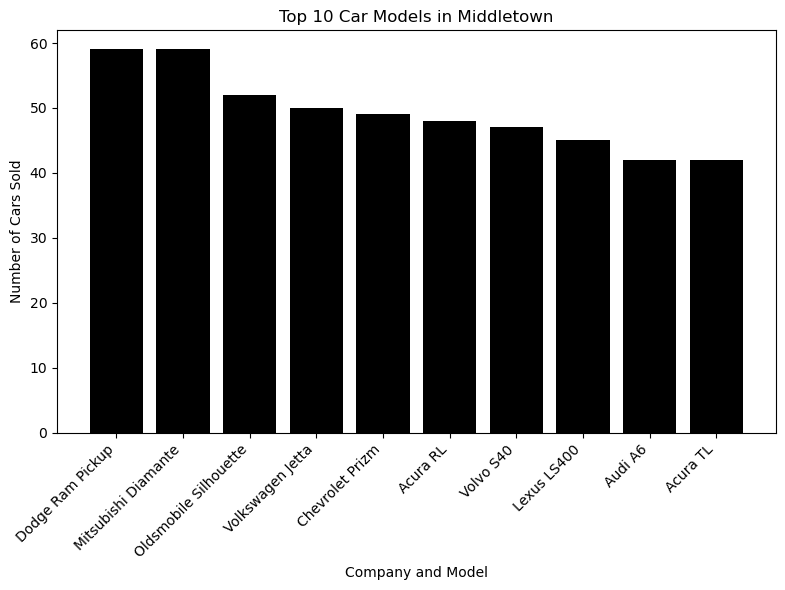

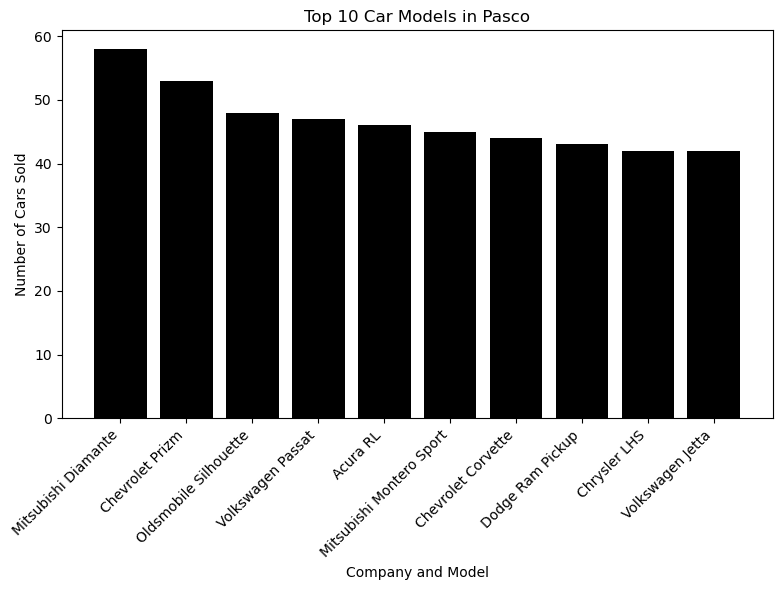

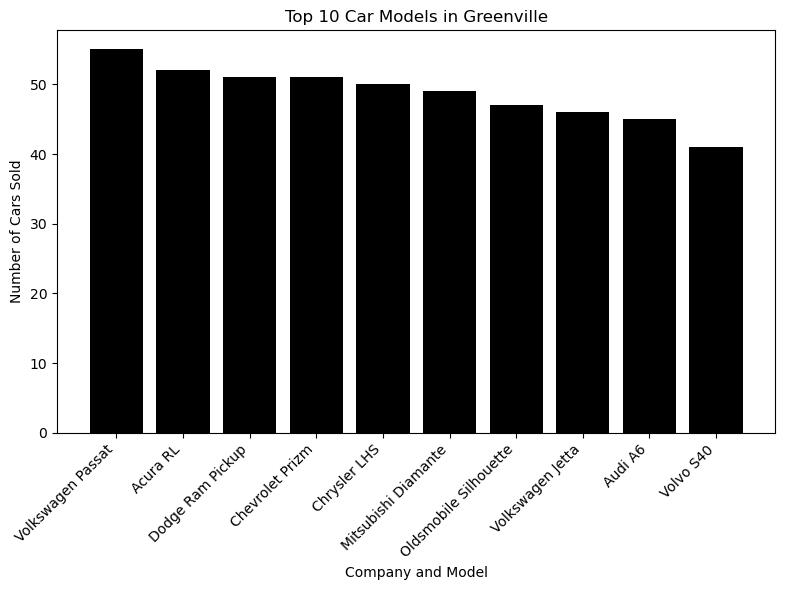

In [129]:
region_company_model_counts = data.groupby(['Dealer_Region', 'Company', 'Model']).size().reset_index(name='Count')

top_10_by_region = region_company_model_counts.sort_values(by='Count', ascending=False).groupby('Dealer_Region').head(10)

top_10_by_region.reset_index(drop=True, inplace=True)

regions = top_10_by_region['Dealer_Region'].unique()

for region in regions:
    region_data = top_10_by_region[top_10_by_region['Dealer_Region'] == region].copy()

    region_data.loc[:, 'Company_Model'] = region_data['Company'] + ' ' + region_data['Model']
    
    plt.figure(figsize=(8, 6))
    plt.bar(region_data['Company_Model'], region_data['Count'], color='#000000')
    plt.title(f'Top 10 Car Models in {region}')
    plt.xlabel('Company and Model')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    
    plt.show()


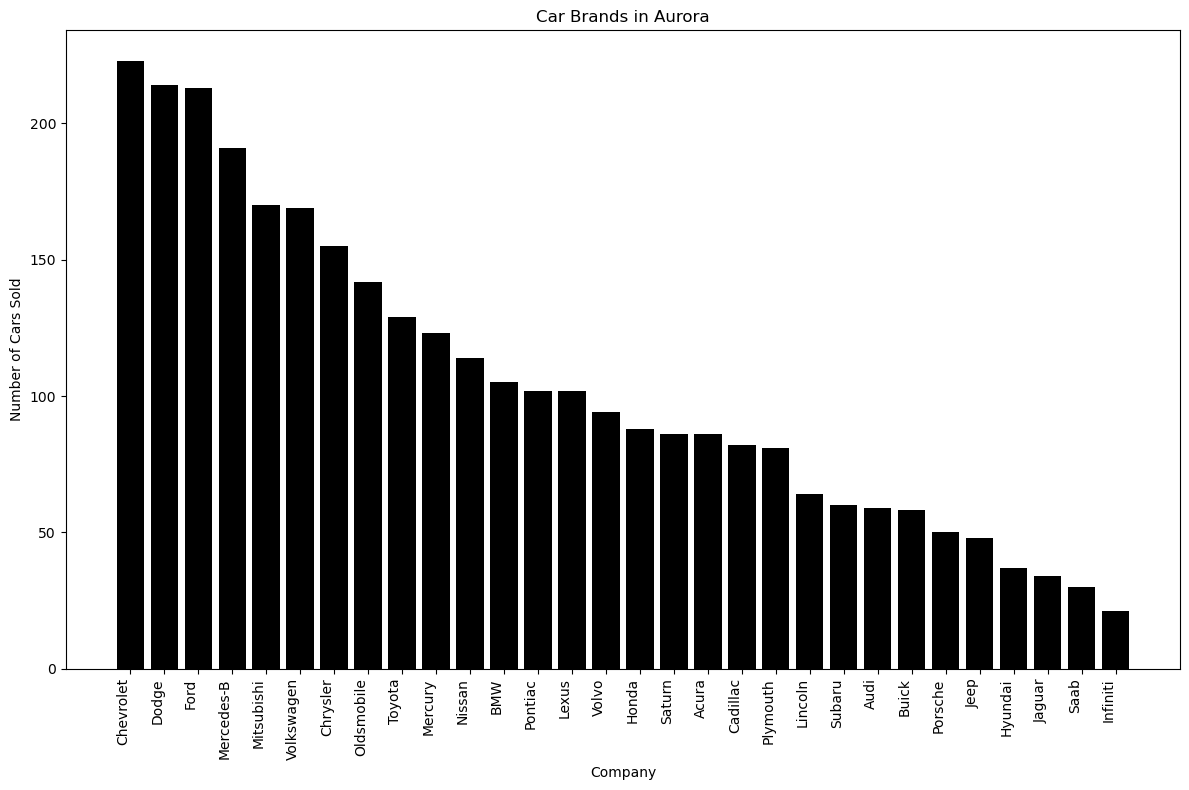

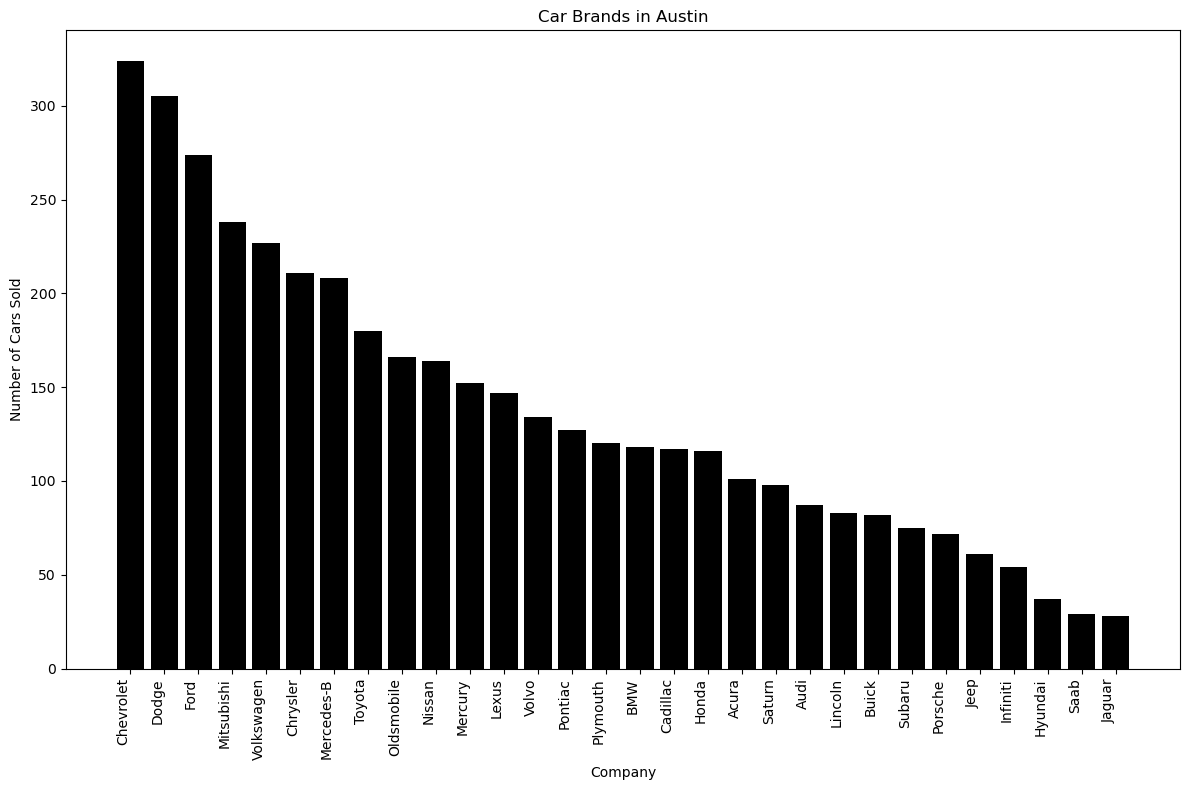

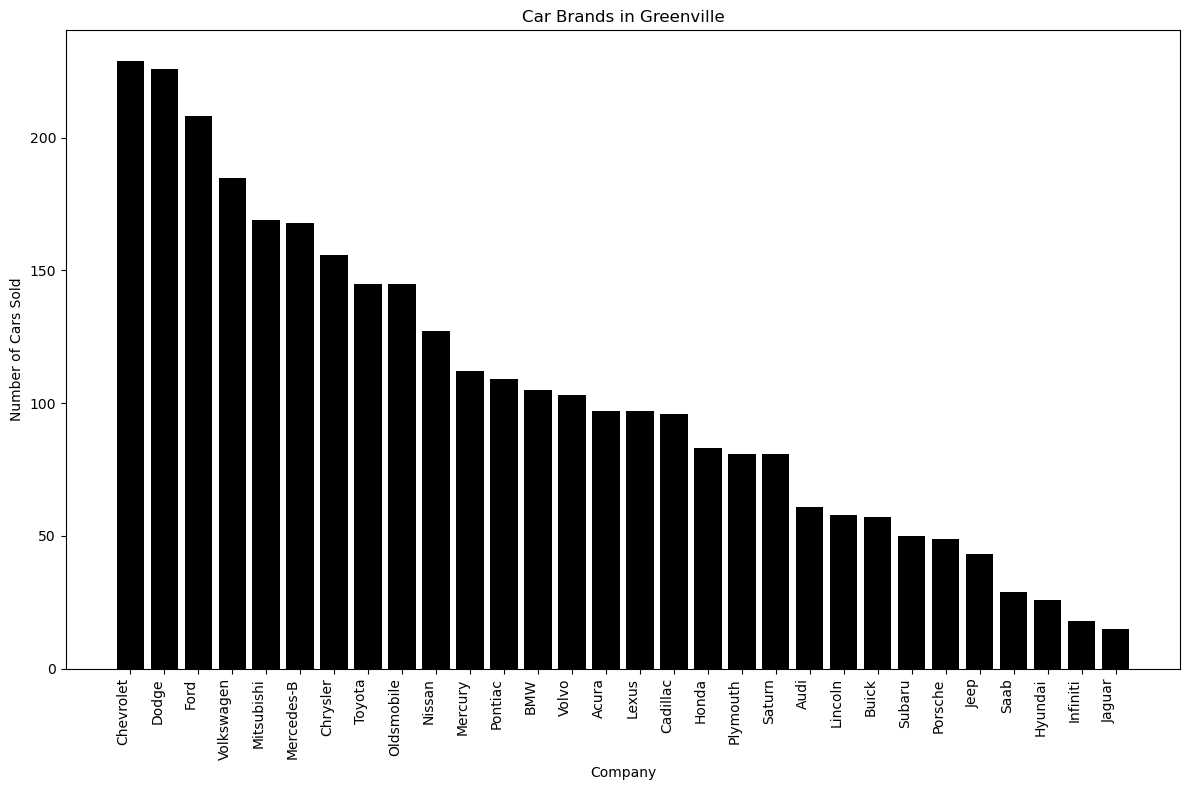

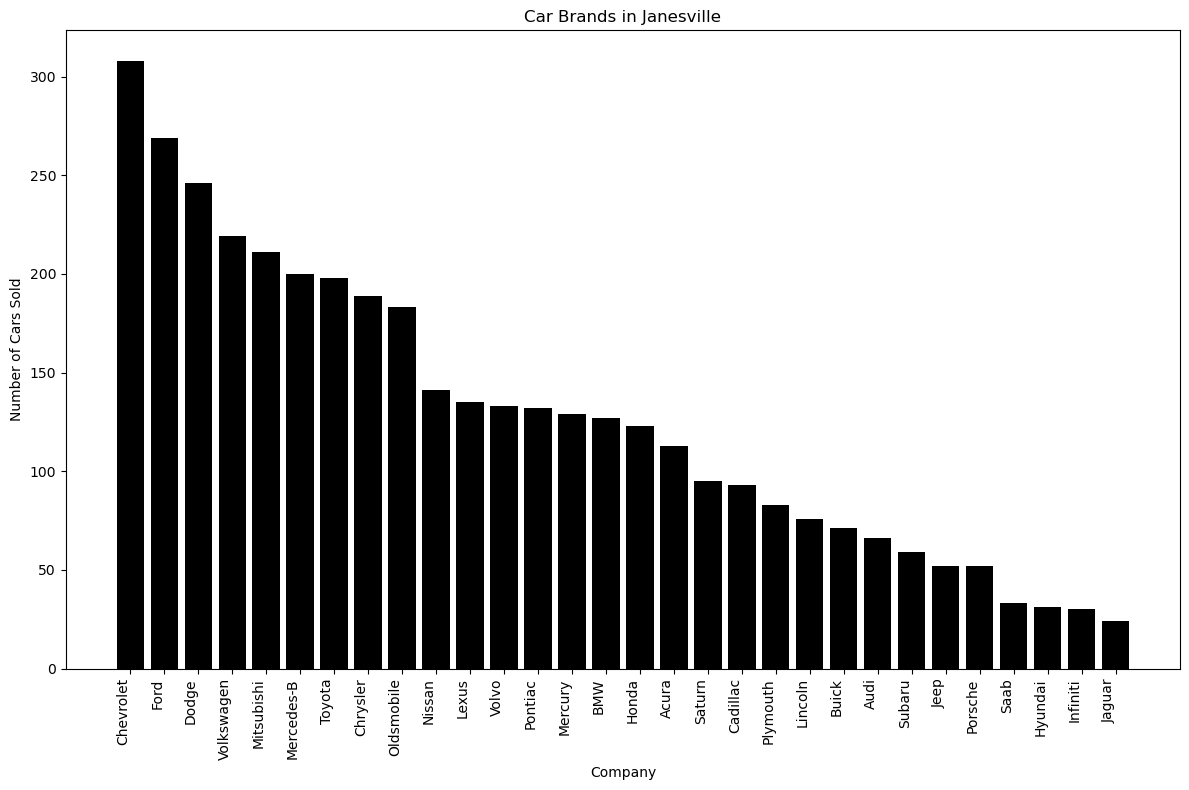

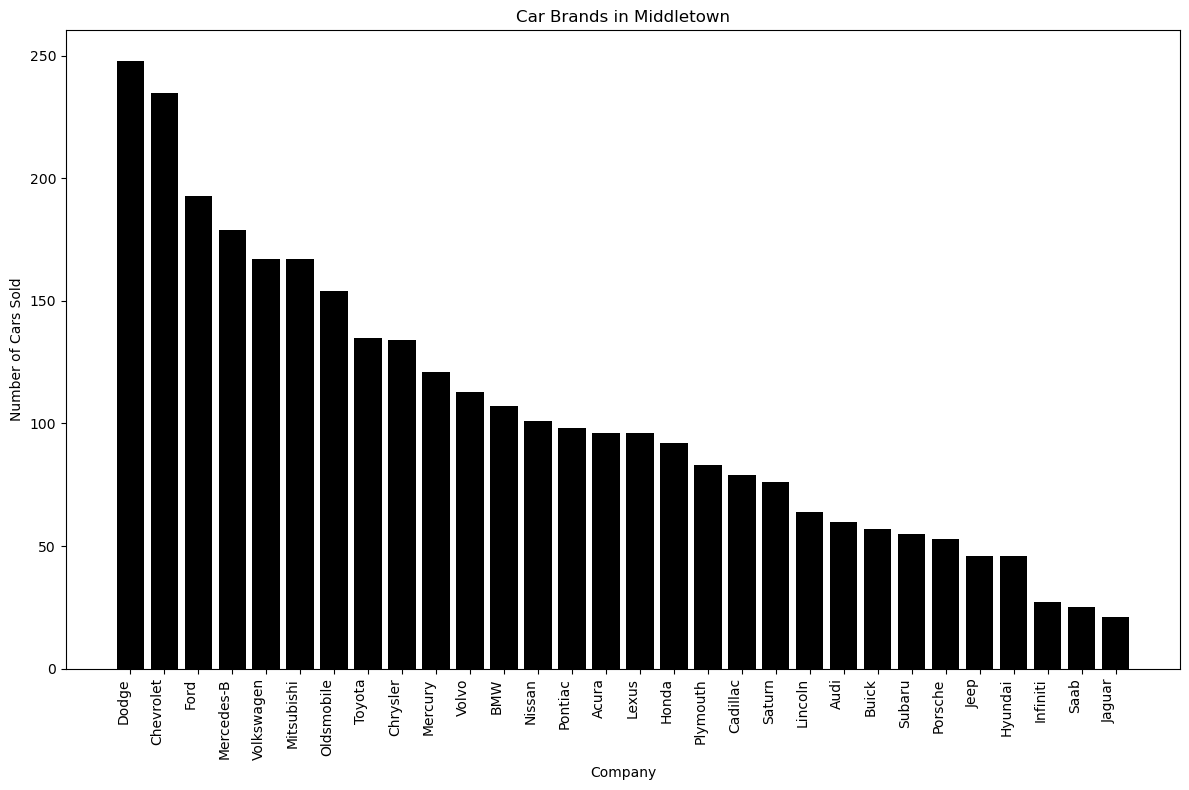

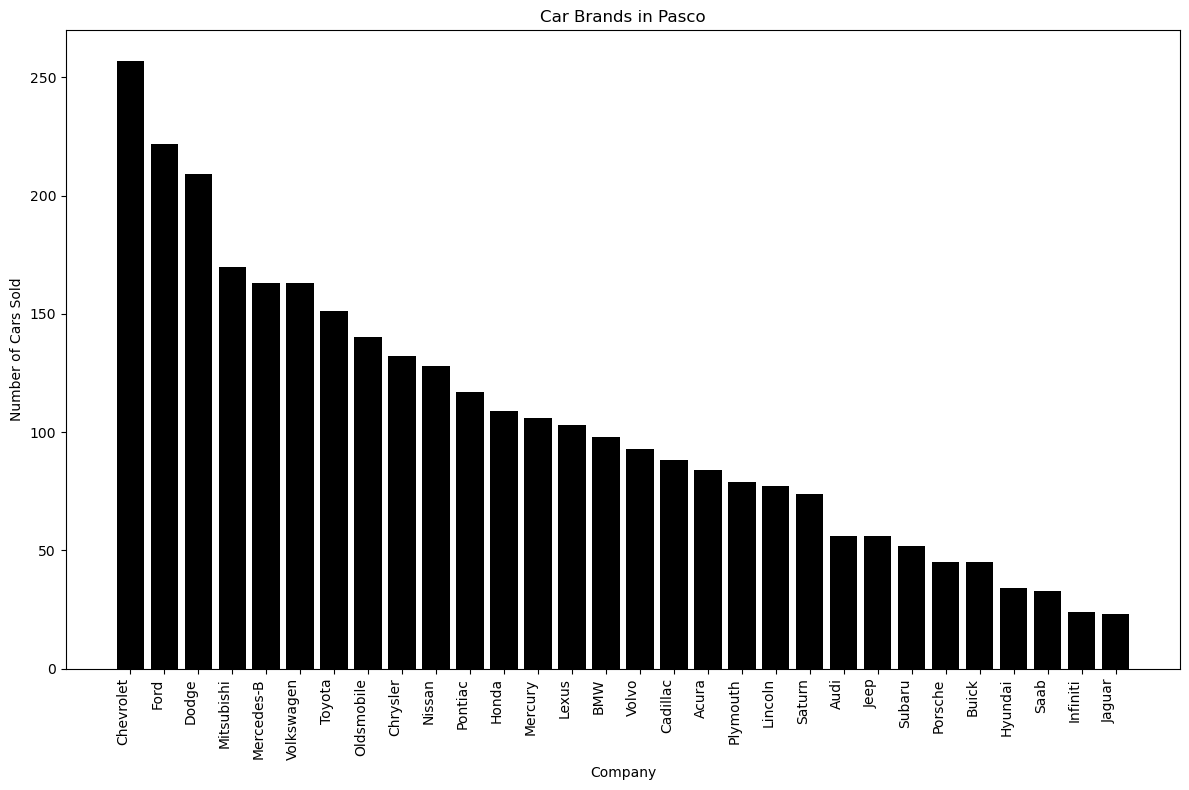

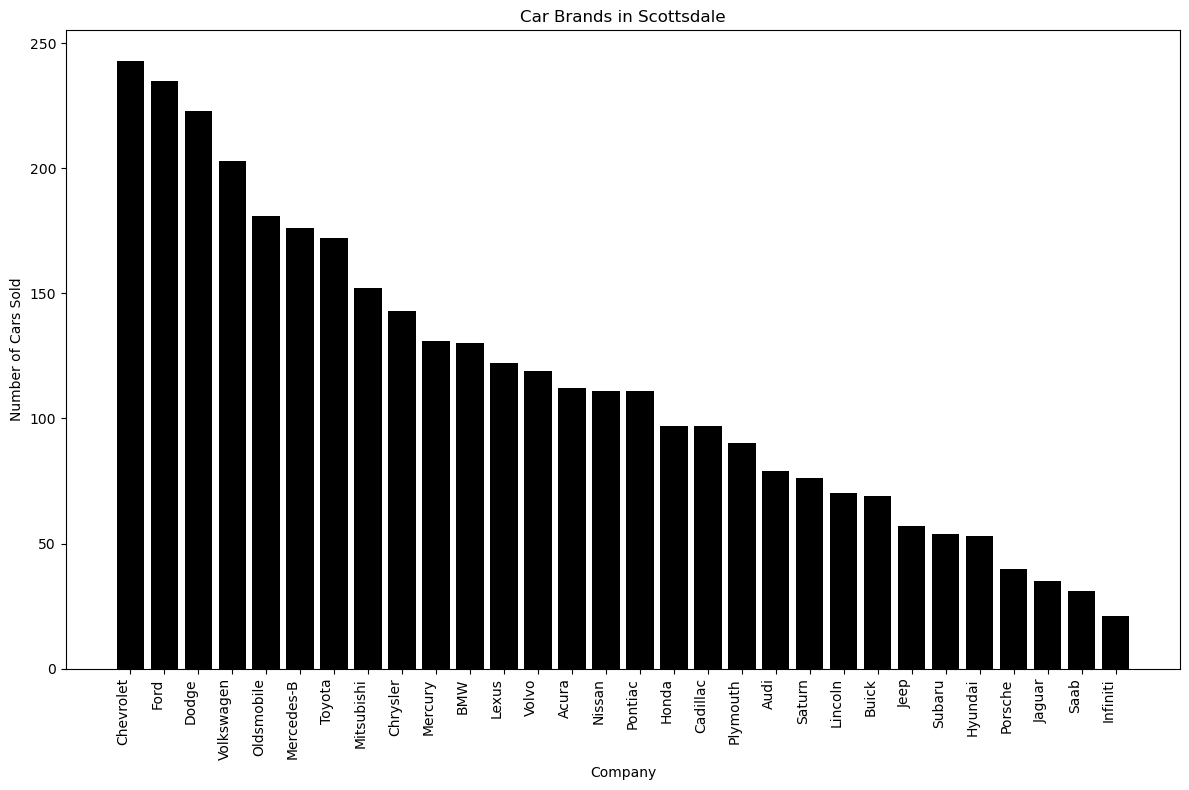

In [134]:
region_company_counts = data.groupby(['Dealer_Region', 'Company']).size().reset_index(name='Count')

region_company_counts.reset_index(drop=True, inplace=True)

regions = region_company_counts['Dealer_Region'].unique()

for region in regions:
    region_data = region_company_counts[region_company_counts['Dealer_Region'] == region].copy()
    
    region_data = region_data.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(region_data['Company'], region_data['Count'], color='#000000')
    plt.title(f'Car Brands in {region}')
    plt.xlabel('Company')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=90, ha='right')
    
    plt.tight_layout()
    
    plt.show()


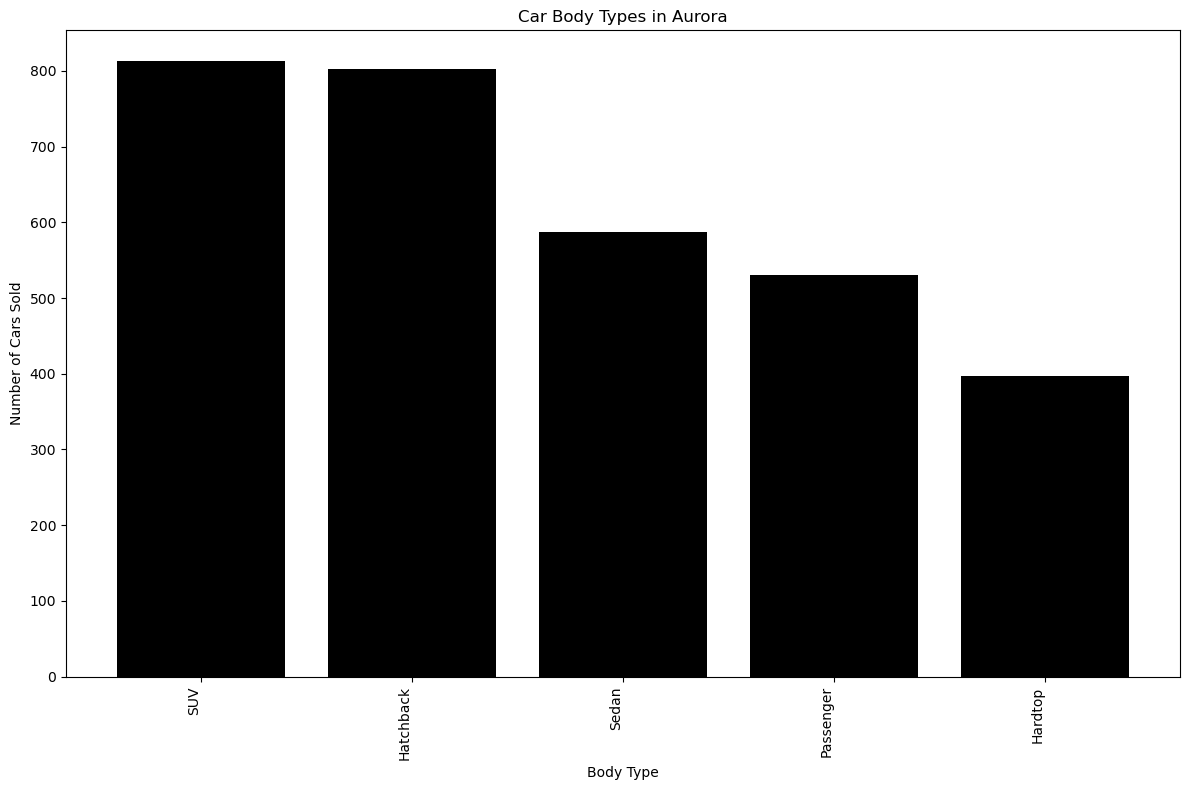

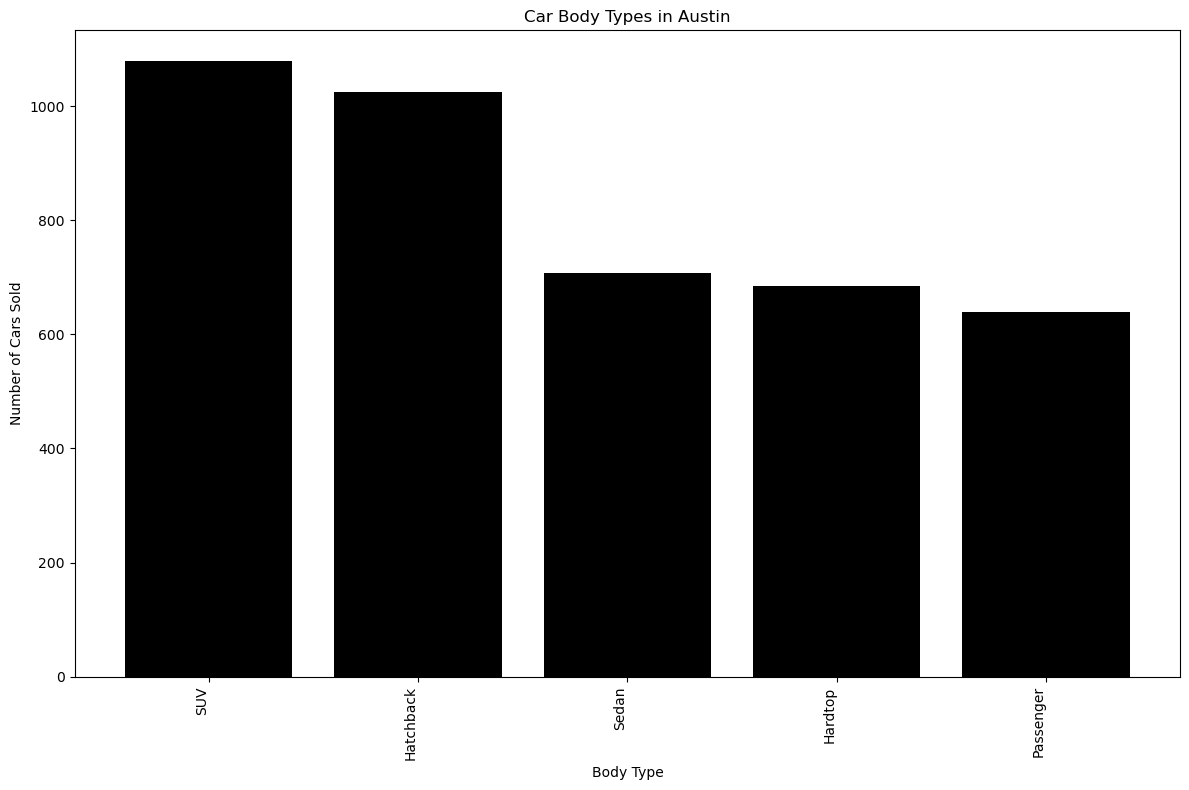

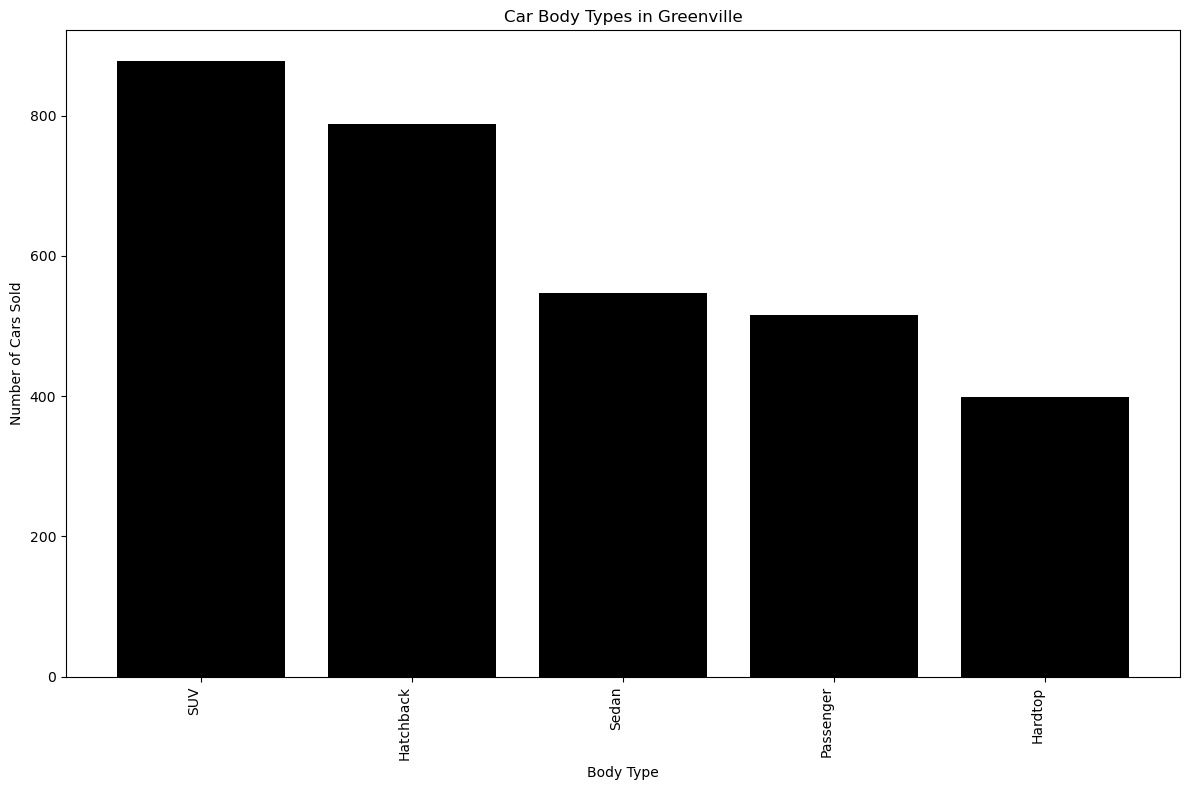

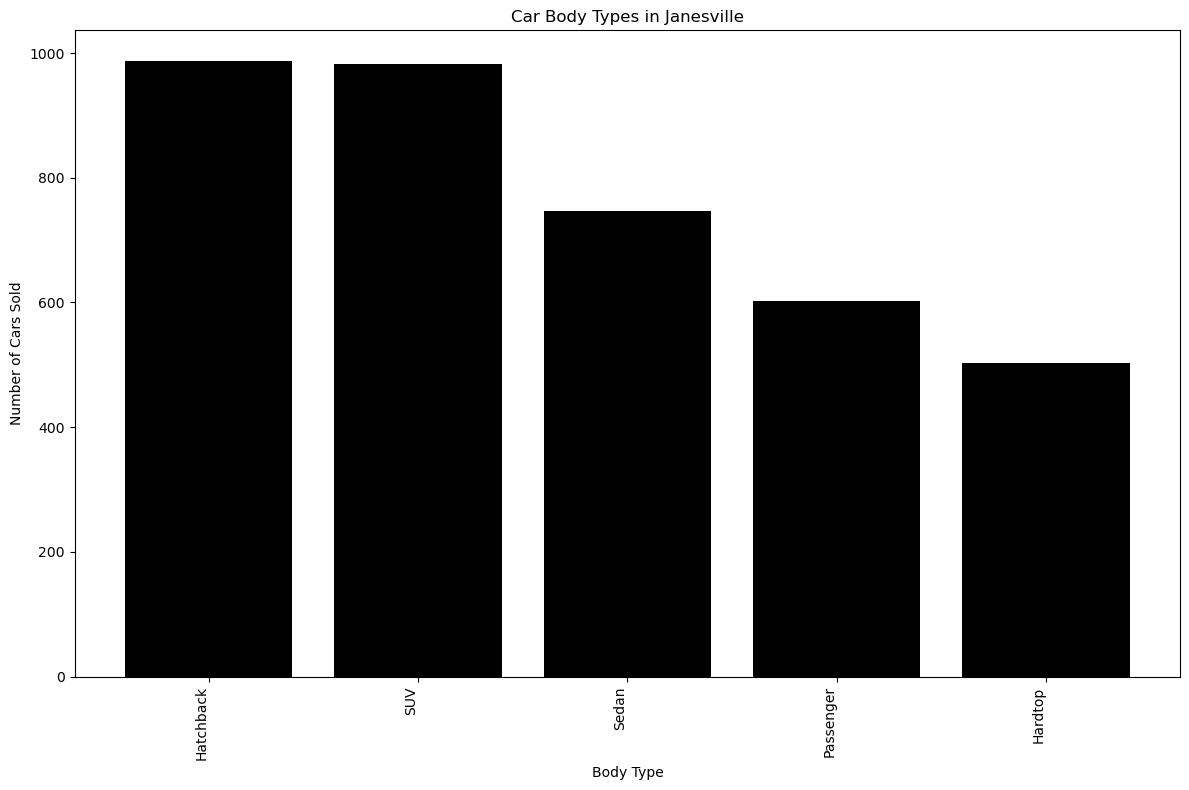

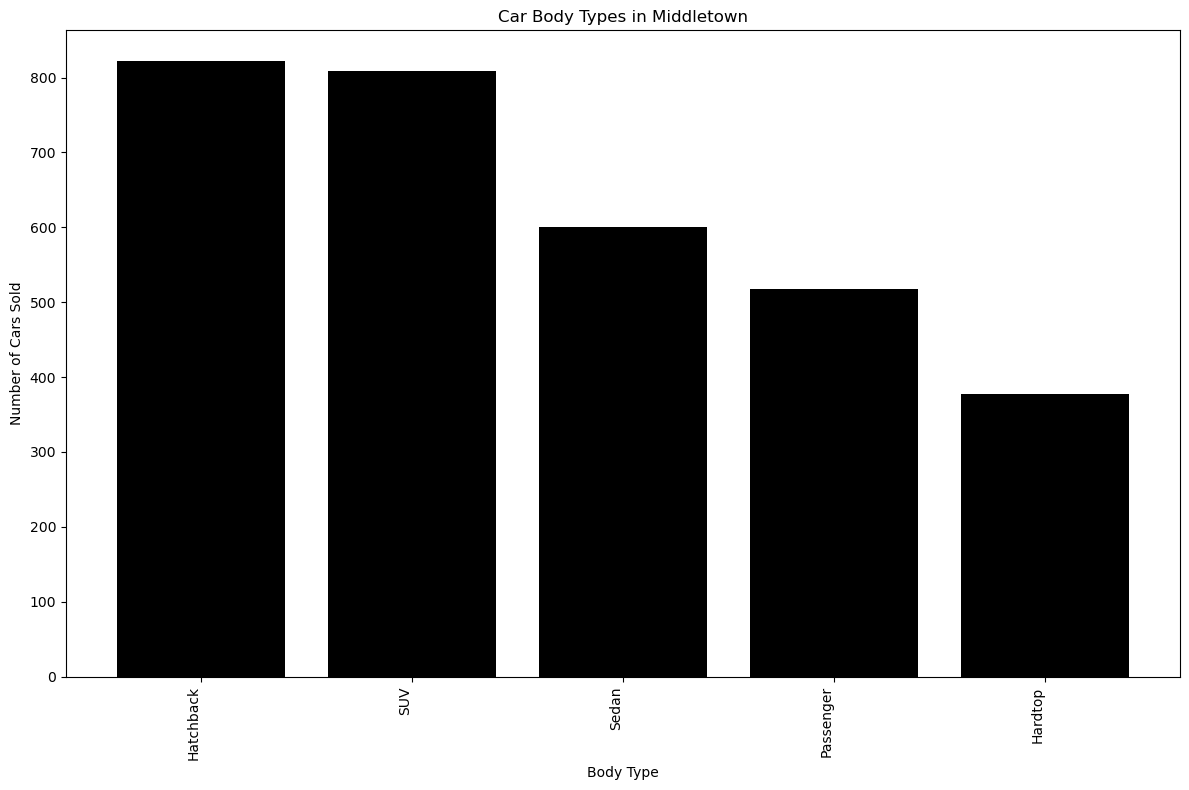

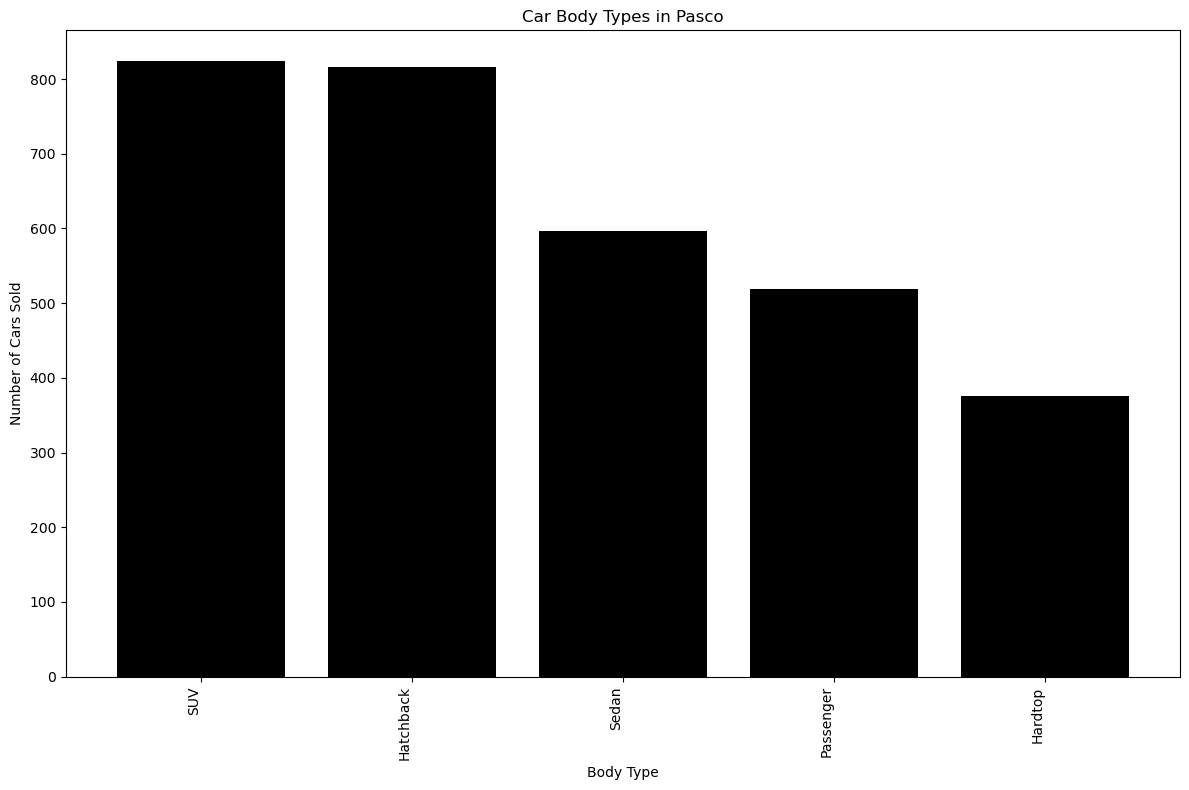

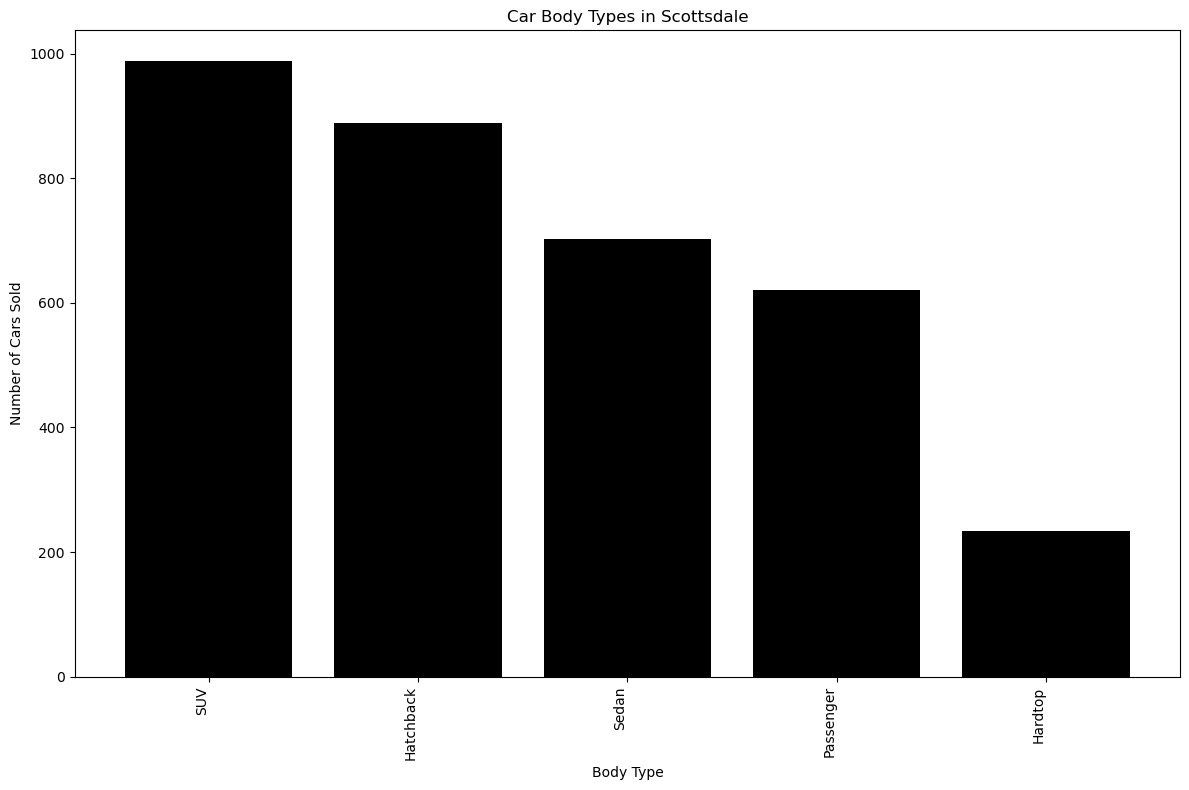

In [139]:
region_body_type_counts = data.groupby(['Dealer_Region', 'Body Style']).size().reset_index(name='Count')

region_body_type_counts.reset_index(drop=True, inplace=True)

regions = region_body_type_counts['Dealer_Region'].unique()

for region in regions:
    region_data = region_body_type_counts[region_body_type_counts['Dealer_Region'] == region].copy()
    region_data = region_data.sort_values(by='Count', ascending=False)
    plt.figure(figsize=(12, 8))
    plt.bar(region_data['Body Style'], region_data['Count'], color='#000000')
    plt.title(f'Car Body Types in {region}')
    plt.xlabel('Body Type')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=90, ha='right')

    plt.tight_layout()

    plt.show()


# Task 6 Summary

The analysis showed that income levels and sales regions significantly influence customer choices in car purchases. Higher income groups preferred premium brands and models, while lower income groups opted for more affordable options. Popular car colors like Black, Pale White, and Red were consistent across all income levels, but Black was more common in higher income groups. SUVs and Hatchbacks were the favored body types across different income levels and regions, with some regional variations favoring Sedans or Passenger vehicles. Regional preferences also showed distinct patterns in brand and model popularity, indicating the influence of local trends and economic factors on consumer choices. These findings can guide dealerships in tailoring their marketing strategies and inventory to meet the preferences of different customer segments.

# Seventh Task

Does the price of the car depend on the make, model, body type, color or region?

What factors have the biggest impact on price differences?

In [92]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Group
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Very Low Income
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High Income
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,High Income
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Very Low Income
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,High Income


In [93]:
top_10_brands_avg_price = data.groupby('Company')['Price ($)'].mean().reset_index()
top_10_brands_avg_price['Price ($)'] = top_10_brands_avg_price['Price ($)'].round(0)  
top_10_brands_avg_price = top_10_brands_avg_price.sort_values(by='Price ($)', ascending=False).head(10)
print(top_10_brands_avg_price)


       Company  Price ($)
4     Cadillac    40972.0
24        Saab    36516.0
14       Lexus    34025.0
3        Buick    33634.0
20  Oldsmobile    31894.0
15     Lincoln    31407.0
25      Saturn    31093.0
27      Toyota    29513.0
21    Plymouth    29405.0
22     Pontiac    29358.0


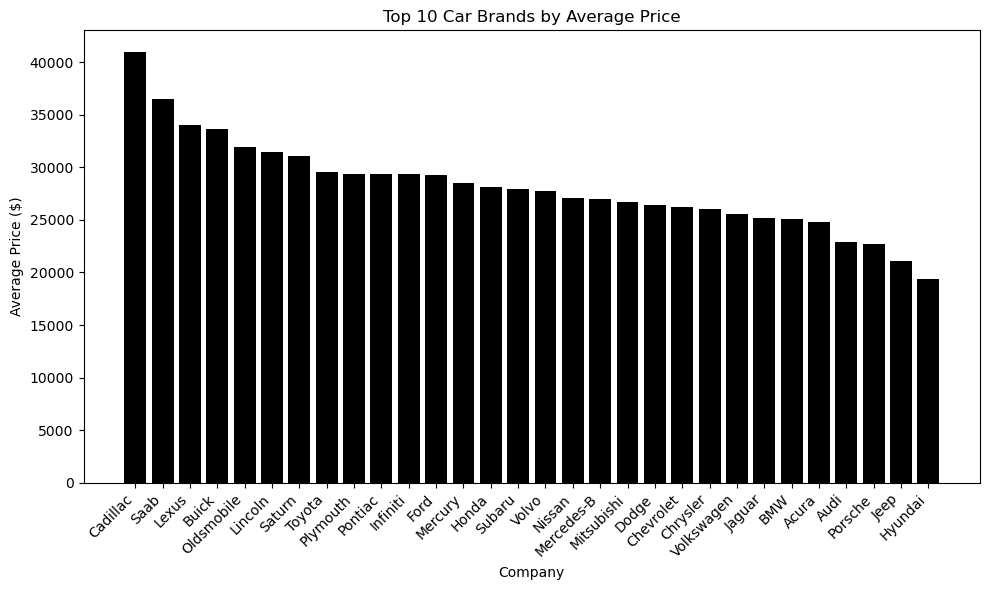

In [94]:
top_10_brands_avg_price = data.groupby('Company')['Price ($)'].mean().reset_index()
top_10_brands_avg_price['Price ($)'] = top_10_brands_avg_price['Price ($)'].round(0)  
top_10_brands_avg_price = top_10_brands_avg_price.sort_values(by='Price ($)', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(top_10_brands_avg_price['Company'], top_10_brands_avg_price['Price ($)'], color='black')

plt.title('Top 10 Car Brands by Average Price')
plt.xlabel('Company')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


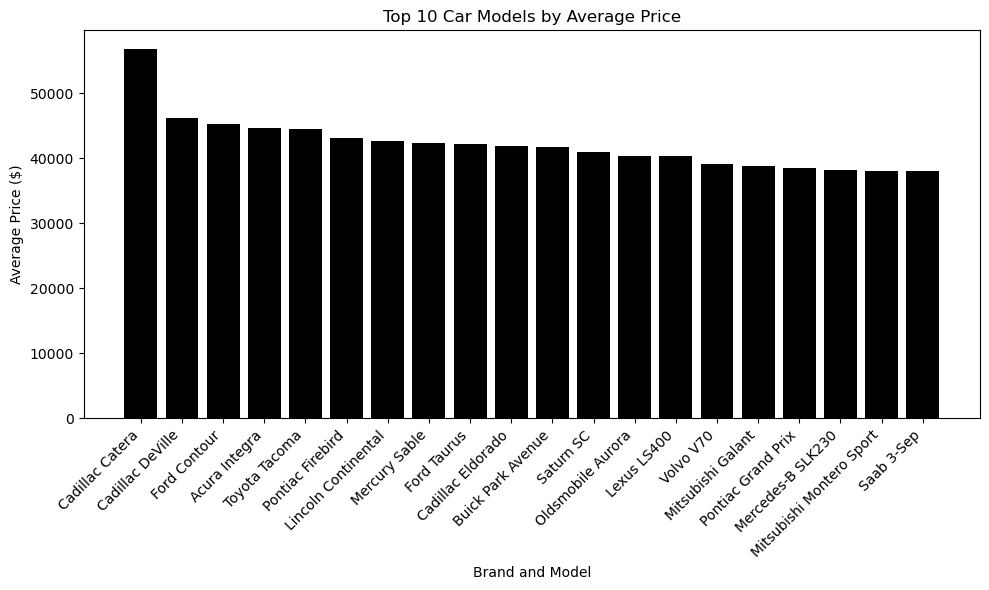

In [95]:
top_10_brands_models_avg_price = data.groupby(['Company', 'Model'])['Price ($)'].mean().reset_index()

top_10_brands_models_avg_price['Price ($)'] = top_10_brands_models_avg_price['Price ($)'].round(0)

top_10_brands_models_avg_price = top_10_brands_models_avg_price.sort_values(by='Price ($)', ascending=False).head(20)

top_10_brands_models_avg_price['Brand_Model'] = top_10_brands_models_avg_price['Company'] + ' ' + top_10_brands_models_avg_price['Model']

plt.figure(figsize=(10, 6))
plt.bar(top_10_brands_models_avg_price['Brand_Model'], top_10_brands_models_avg_price['Price ($)'], color='black')

plt.title('Top 10 Car Models by Average Price')
plt.xlabel('Brand and Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


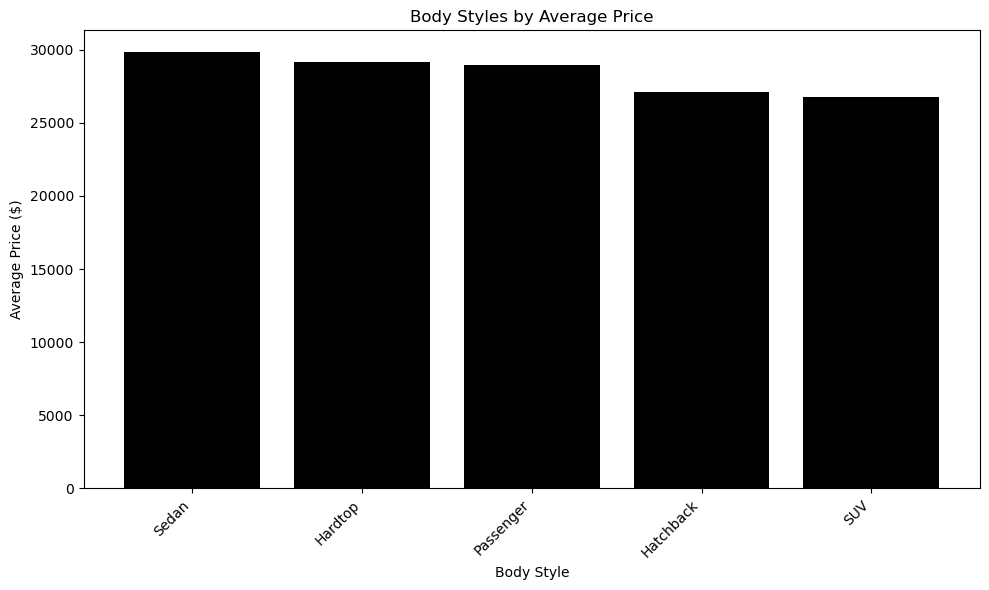

In [96]:
top_10_body_styles_avg_price = data.groupby('Body Style')['Price ($)'].mean().reset_index()
top_10_body_styles_avg_price['Price ($)'] = top_10_body_styles_avg_price['Price ($)'].round(0)  
top_10_body_styles_avg_price = top_10_body_styles_avg_price.sort_values(by='Price ($)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_body_styles_avg_price['Body Style'], top_10_body_styles_avg_price['Price ($)'], color='black')

plt.title('Body Styles by Average Price')
plt.xlabel('Body Style')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


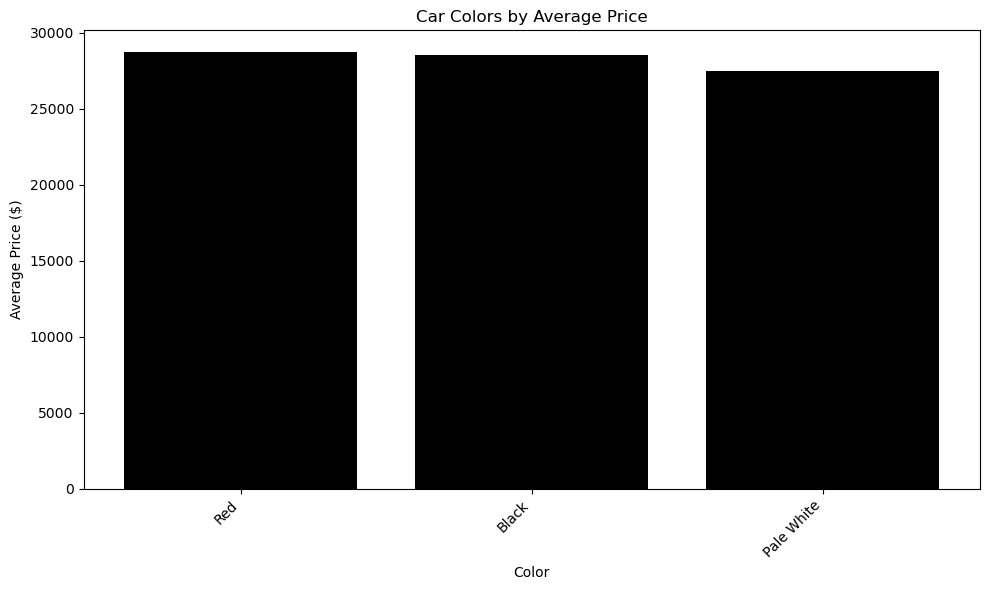

In [97]:
top_10_colors_avg_price = data.groupby('Color')['Price ($)'].mean().reset_index()
top_10_colors_avg_price['Price ($)'] = top_10_colors_avg_price['Price ($)'].round(0)  
top_10_colors_avg_price = top_10_colors_avg_price.sort_values(by='Price ($)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_colors_avg_price['Color'], top_10_colors_avg_price['Price ($)'], color='black')

plt.title('Car Colors by Average Price')
plt.xlabel('Color')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The analysis shows that Cadillac, Saab, and Lexus are the brands with the highest average car prices, with Cadillac leading at $46,972. Models such as the Cadillac Catera and DeVille are the most expensive, contributing to the high average price for the brand.

When it comes to body styles, Sedans and Hardtops are generally the most expensive, with average prices around $30,000, indicating a preference for more traditional car types among higher-priced vehicles.

Regarding color, red cars tend to have the highest average price, followed closely by black and pale white, which suggests that color choices may also influence car pricing.

In summary, luxury brands, classic body styles, and certain colors are associated with higher car prices.